# Data Analysis for Damped Oscillations in Fluids

Technologies: Python (NumPy, Pandas, Matplotlib)

This notebook contains code used to analyze the data obtained using Arduino for the damped oscillations experiment.

# Air: experiment 1

In [ ]:
from google.colab import drive
drive.mount('drive')
import numpy as np
from scipy.optimize import least_squares

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [ ]:
read_in_array_air_1 = np.loadtxt('/content/drive/MyDrive/Physics 4AL/Final Project Data/Copy of air1.txt', delimiter = ';', skiprows = 1)

In [ ]:
# Get the zeroeth column
time_data_array_air_1 = read_in_array_air_1[:, 0]

# convert from ms to s
time_data_array_air_1 = time_data_array_air_1/1000

In [ ]:
# Get the fourth column, the second and third column in the data are accelerations from the accelerometer sensor
position_data_array_air_1 = read_in_array_air_1[:, 1]

# convert from mm to m
position_data_array_air_1=position_data_array_air_1/1000

Text(0, 0.5, 'Distance (m)')

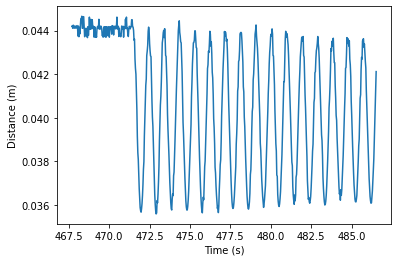

In [ ]:
import matplotlib.pyplot as plt
plt.plot(time_data_array_air_1, position_data_array_air_1)
plt.xlabel('Time (s)')
plt.ylabel('Distance (m)')

Fitting an undamped cosine function to a small portion of data, plotting position versus index. We cut to around 1.5 oscillations. This will help inform our parameters.

Text(0.5, 0, 'Index')

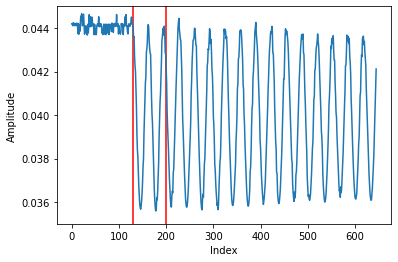

In [ ]:
plt.plot(position_data_array_air_1)
plt.vlines(130, 0.035, 0.045, color = 'red')
plt.vlines(200, 0.035, 0.045, color = 'red')
plt.ylim([0.035, 0.045])
plt.ylabel('Amplitude')
plt.xlabel('Index')

In [ ]:
position_data_array_clip1_air_1 = position_data_array_air_1[130:200]
time_data_array_clip1_air_1 = time_data_array_air_1[130:200]
time_data_array_clip1_air_1 = time_data_array_clip1_air_1 - time_data_array_clip1_air_1[0]

Text(0, 0.5, 'Amplitude')

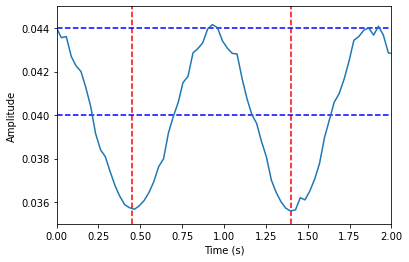

In [ ]:
plt.plot(time_data_array_clip1_air_1, position_data_array_clip1_air_1)
plt.vlines(.45, .035, 0.045, color = 'red', linestyle = 'dashed')
plt.vlines(1.4, 0.035, 0.045, color = 'red', linestyle = 'dashed')

plt.hlines(0.04, 0, 2.6,  color = 'blue', linestyle = 'dashed')
plt.hlines(0.044, 0, 2.6,  color = 'blue', linestyle = 'dashed')

plt.xlim([0, 2.0])
plt.ylim([0.035, 0.045])

plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

Use this graph to guess parameters.

In [ ]:
guess_amplitude_air_1 = 0.004
guess_omega_air_1 = 2 * np.pi / (1.4 - 0.45)
guess_offset_air_1 = 0.04 #distance to centerline
guess_phi_air_1 = 0.05

guess_parameters_air_1 = [guess_amplitude_air_1, guess_omega_air_1, guess_offset_air_1, guess_phi_air_1]

These functions will be used for fitting.

In [ ]:
def cos_fit_fun_1(parameters, time):
  a = parameters[0]
  omega = parameters[1]
  offset = parameters[2]
  phi = parameters[3]
  y = a * np.cos(omega * time + phi) + offset
  return y

In [ ]:
def get_residuals(parameters, position_data, time_data):
  theoretical_function = cos_fit_fun_1(parameters, time_data)
  residuals = np.abs(theoretical_function - position_data)
  return residuals

Text(0, 0.5, 'Position (m)')

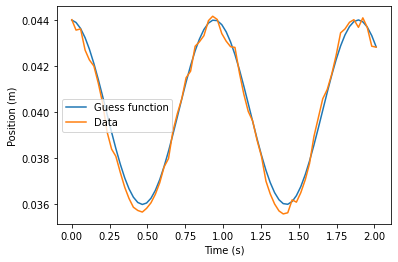

In [ ]:
theoretical_guess_function_air_1 = cos_fit_fun_1(guess_parameters_air_1, time_data_array_clip1_air_1)
plt.plot(time_data_array_clip1_air_1, theoretical_guess_function_air_1, label='Guess function')
plt.plot(time_data_array_clip1_air_1, position_data_array_clip1_air_1, label = 'Data')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')

Now, apply least square algorithm.

In [ ]:
res_lsq_air_1 = least_squares(get_residuals, guess_parameters_air_1, args=(position_data_array_clip1_air_1,time_data_array_clip1_air_1))

Best Amplitude: 0.004147830251903921
Best Omega: 6.618121919384106
Best offset: 0.03985696985018022
Best Phi: 0.10238780461689831


Text(0, 0.5, 'Position (m)')

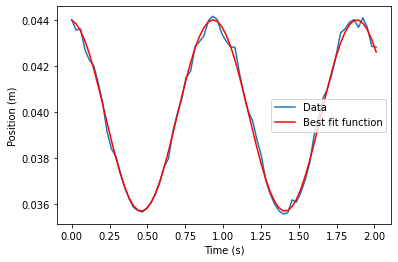

In [ ]:
best_parameters_air_1 = res_lsq_air_1['x']
fitted_function_air_1 = cos_fit_fun_1(best_parameters_air_1, time_data_array_clip1_air_1)
plt.plot(time_data_array_clip1_air_1, position_data_array_clip1_air_1, label = 'Data')
plt.plot(time_data_array_clip1_air_1, fitted_function_air_1, color = 'red', label='Best fit function')
print('Best Amplitude: ' + str(best_parameters_air_1[0]))
print('Best Omega: ' + str(best_parameters_air_1[1]))
print('Best offset: ' + str(best_parameters_air_1[2]))
print('Best Phi: ' + str(best_parameters_air_1[3]))
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')

Now, applying this to the full range of data.

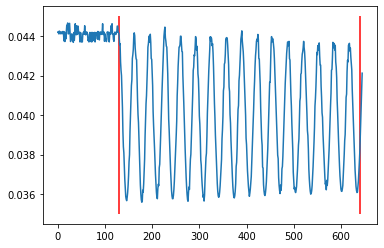

In [ ]:
# Plot vs index to see where we should cut off the data
plt.plot(position_data_array_air_1)
plt.vlines(130, 0.035, 0.045, color = 'red')
plt.vlines(640, 0.035, 0.045, color = 'red')
#plt.ylim()

In [ ]:
position_data_array_clip2_air_1 = position_data_array_air_1[130:]
time_data_array_clip2_air_1 = time_data_array_air_1[130:]
time_data_array_clip2_air_1 = time_data_array_clip2_air_1 - time_data_array_clip2_air_1[0]

See how initial best fit cimpares to full range of data.

Text(0, 0.5, 'Position (m)')

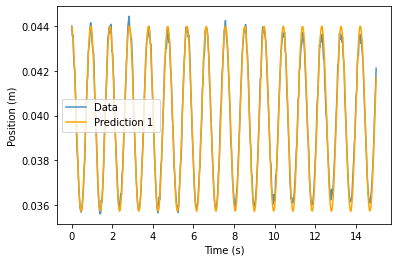

In [ ]:
guess_parameters_air_1 = best_parameters_air_1
theoretical_guess_function_air_1 = cos_fit_fun_1(guess_parameters_air_1, time_data_array_clip2_air_1)
plt.plot(time_data_array_clip2_air_1, position_data_array_clip2_air_1, alpha = 0.8, label = 'Data')
plt.plot(time_data_array_clip2_air_1, theoretical_guess_function_air_1, color='orange', label = 'Prediction 1 ')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')

In [ ]:
res_lsq_air_1 = least_squares(get_residuals, guess_parameters_air_1, args=(position_data_array_clip2_air_1,time_data_array_clip2_air_1))

Next fitted function with damping.

Best Amplitude: 0.003966997797492551
Best Omega: 6.6230858237360755
Best offset: 0.039885528990339474
Best Phi: 0.08277254003231457


Text(0, 0.5, 'Position (m)')

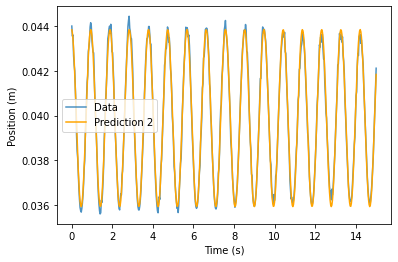

In [ ]:
best_parameters_air_1 = res_lsq_air_1['x']
fitted_function_air_1 = cos_fit_fun_1(best_parameters_air_1, time_data_array_clip2_air_1)
plt.plot(time_data_array_clip2_air_1, position_data_array_clip2_air_1, alpha = 0.8, label='Data')
plt.plot(time_data_array_clip2_air_1, fitted_function_air_1, color = 'orange', label='Prediction 2')
print('Best Amplitude: ' + str(best_parameters_air_1[0]))
print('Best Omega: ' + str(best_parameters_air_1[1]))
print('Best offset: ' + str(best_parameters_air_1[2]))
print('Best Phi: ' + str(best_parameters_air_1[3]))
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')

Functions for residuals and damping.

In [ ]:
def cos_fit_fun_damped(parameters, time):
  a = parameters[0]
  omega = parameters[1]
  offset = parameters[2]
  phi = parameters[3]
  tau = parameters[4]
  y = a * np.cos(omega * time + phi) * np.exp(-time / tau) + offset
  return y

In [ ]:
def get_residuals(parameters, position_data, time_data):
  theoretical_function = cos_fit_fun_damped(parameters, time_data)
  residuals = np.abs(theoretical_function - position_data)
  return residuals

Text(0, 0.5, 'Height')

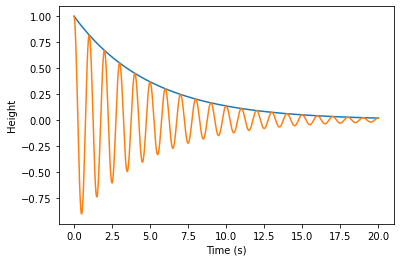

In [ ]:
time_axis_air_1 = np.linspace(0, 20., 1000)
oscillation_air_1 = np.cos(2. * np.pi * time_axis_air_1)
exponential_air_1 = np.exp(-time_axis_air_1 / 5.)
plt.plot(time_axis_air_1, exponential_air_1)
plt.xlabel('Time (s)')
plt.plot(time_axis_air_1, exponential_air_1 * oscillation_air_1)
plt.ylabel('Height')

(-0.5, 7.0)

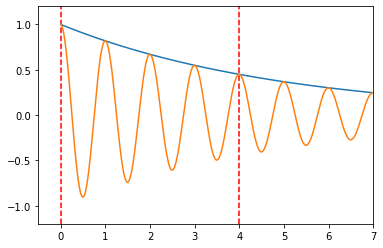

In [ ]:
time_axis_air_1 = np.linspace(0, 7., 1000)
oscillation_air_1 = np.cos(2. * np.pi * time_axis_air_1)
exponential_air_1 = np.exp(-time_axis_air_1 / 5.)
plt.plot(time_axis_air_1, exponential_air_1)
plt.plot(time_axis_air_1, exponential_air_1 * oscillation_air_1)
plt.vlines(0., -1.2, 1.2, color = 'red', linestyle = 'dashed')
plt.vlines(4., -1.2, 1.2, color = 'red', linestyle = 'dashed')
plt.ylim([-1.2, 1.2])
plt.xlim([-0.5, 7])

Best offset: 0.039885528990339474


Text(0, 0.5, 'Position (m)')

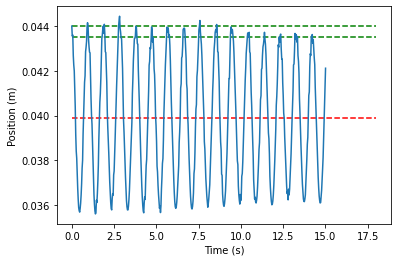

In [ ]:
best_parameters_air_1 = res_lsq_air_1['x']
plt.plot(time_data_array_clip2_air_1, position_data_array_clip2_air_1)

# To see the offset
plt.hlines(best_parameters_air_1[2],-0, 18, color = 'red', linestyle = 'dashed')
print('Best offset: ' + str(best_parameters_air_1[2]))

# To see the peak of the first cycle and the 11th cycle
plt.hlines([0.0435, 0.044], 0, 18, color = 'green', linestyle = 'dashed')

plt.xlabel('Time (s)')
plt.ylabel('Position (m)')

Function to find tau.

In [ ]:
def find_tau(t, y_t, y_0):
  nom = t
  denom = np.log(y_0 / y_t)
  tau = nom / denom
  print('Tau is ' + str(tau))



In [ ]:
find_tau(15, .0035, .004)

Tau is 112.33313534127932


In [ ]:
guess_parameters_air_1 = np.append(best_parameters_air_1, 49.0)
print(guess_parameters_air_1)

[3.96699780e-03 6.62308582e+00 3.98855290e-02 8.27725400e-02
 4.90000000e+01]


Text(0, 0.5, 'Position (m)')

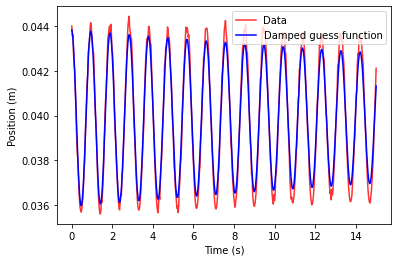

In [ ]:
theoretical_guess_function_air_1 = cos_fit_fun_damped(guess_parameters_air_1, time_data_array_clip2_air_1)
plt.plot(time_data_array_clip2_air_1, position_data_array_clip2_air_1, color = 'red', alpha = 0.8, label = 'Data')
plt.plot(time_data_array_clip2_air_1, theoretical_guess_function_air_1, color = 'blue', label = 'Damped guess function')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')

In [ ]:
def get_residuals(parameters, position_data, time_data):
  theoretical_function = cos_fit_fun_damped(parameters, time_data)
  residuals = np.abs(theoretical_function - position_data)
  return residuals

Best Amplitude: 0.004213841616645469
Best Omega: 6.6228751457158594
Best offset: 0.03988360578101781
Best Phi: 0.08453272094589989
Best Tau: 122.41048535321676


Text(0, 0.5, 'Position (m)')

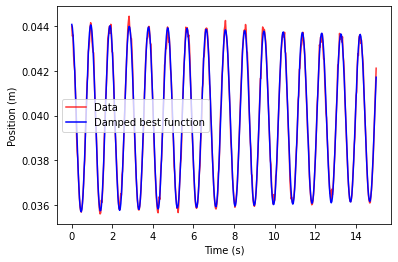

In [ ]:
res_lsq_air_1 = least_squares(get_residuals, guess_parameters_air_1, args=(position_data_array_clip2_air_1,time_data_array_clip2_air_1))
best_parameters_air_1 = res_lsq_air_1['x']
fitted_function_air_1 = cos_fit_fun_damped(best_parameters_air_1, time_data_array_clip2_air_1)
plt.plot(time_data_array_clip2_air_1, position_data_array_clip2_air_1, color='red',alpha = 0.8, label='Data')
plt.plot(time_data_array_clip2_air_1, fitted_function_air_1, color = 'blue', label = 'Damped best function' )
print('Best Amplitude: ' + str(best_parameters_air_1[0]))
print('Best Omega: ' + str(best_parameters_air_1[1]))
print('Best offset: ' + str(best_parameters_air_1[2]))
print('Best Phi: ' + str(best_parameters_air_1[3]))
print('Best Tau: ' + str(best_parameters_air_1[4]))
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')

Wow that took a lot longer than I though. Now we need to do this like 8 more times.

# Air: experiment 2

In [ ]:
read_in_array_air_2 = np.loadtxt('/content/drive/MyDrive/Physics 4AL/Final Project Data/Copy of air2.txt', delimiter = ';', skiprows = 1)

In [ ]:
# Get the zeroeth column
time_data_array_air_2 = read_in_array_air_2[:, 0]

# convert from ms to s
time_data_array_air_2 = time_data_array_air_2/1000

In [ ]:
# Get the fourth column, the second and third column in the data are accelerations from the accelerometer sensor
position_data_array_air_2 = read_in_array_air_2[:, 1]

# convert from mm to m
position_data_array_air_2=position_data_array_air_2/1000

Text(0, 0.5, 'Distance (m)')

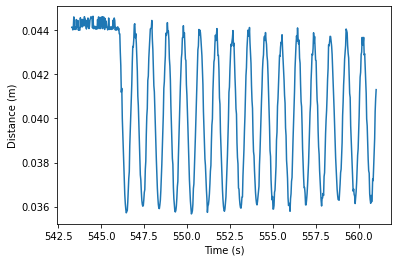

In [ ]:
import matplotlib.pyplot as plt
plt.plot(time_data_array_air_2, position_data_array_air_2)
plt.xlabel('Time (s)')
plt.ylabel('Distance (m)')

Fitting an undamped cosine function to a small portion of data, plotting position versus index. We cut to around 1.5 oscillations. This will help inform our parameters.

Text(0.5, 0, 'Index')

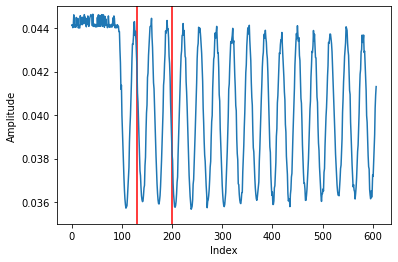

In [ ]:
plt.plot(position_data_array_air_2)
plt.vlines(130, 0.035, 0.045, color = 'red')
plt.vlines(200, 0.035, 0.045, color = 'red')
plt.ylim([0.035, 0.045])
plt.ylabel('Amplitude')
plt.xlabel('Index')

In [ ]:
position_data_array_clip1_air_2 = position_data_array_air_2[130:200]
time_data_array_clip1_air_2 = time_data_array_air_2[130:200]
time_data_array_clip1_air_2 = time_data_array_clip1_air_2 - time_data_array_clip1_air_2[0]

Text(0, 0.5, 'Amplitude')

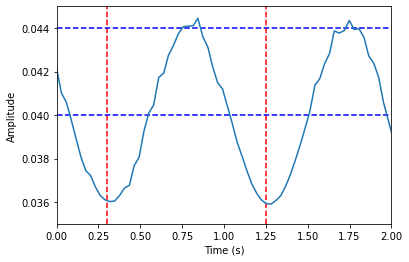

In [ ]:
plt.plot(time_data_array_clip1_air_2, position_data_array_clip1_air_2)
plt.vlines(.3, .035, 0.045, color = 'red', linestyle = 'dashed')
plt.vlines(1.25, 0.035, 0.045, color = 'red', linestyle = 'dashed')

plt.hlines(0.04, 0, 2.6,  color = 'blue', linestyle = 'dashed')
plt.hlines(0.044, 0, 2.6,  color = 'blue', linestyle = 'dashed')

plt.xlim([0, 2.0])
plt.ylim([0.035, 0.045])

plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

Use this graph to guess parameters.

In [ ]:
guess_amplitude_air_2 = 0.004
guess_omega_air_2 = 2 * np.pi / (1.25 - 0.3)
guess_offset_air_2 = 0.04 #distance to centerline
guess_phi_air_2 = 0.9

guess_parameters_air_2 = [guess_amplitude_air_2, guess_omega_air_2, guess_offset_air_2, guess_phi_air_2]

These functions will be used for fitting.

In [ ]:
def cos_fit_fun_1(parameters, time):
  a = parameters[0]
  omega = parameters[1]
  offset = parameters[2]
  phi = parameters[3]
  y = a * np.cos(omega * time + phi) + offset
  return y

In [ ]:
def get_residuals(parameters, position_data, time_data):
  theoretical_function = cos_fit_fun_1(parameters, time_data)
  residuals = np.abs(theoretical_function - position_data)
  return residuals

Text(0, 0.5, 'Position (m)')

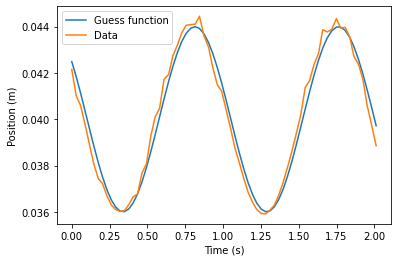

In [ ]:
theoretical_guess_function_air_2 = cos_fit_fun_1(guess_parameters_air_2, time_data_array_clip1_air_2)
plt.plot(time_data_array_clip1_air_2, theoretical_guess_function_air_2, label='Guess function')
plt.plot(time_data_array_clip1_air_2, position_data_array_clip1_air_2, label = 'Data')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')

Now, apply least square algorithm.

In [ ]:
res_lsq_air_2 = least_squares(get_residuals, guess_parameters_air_2, args=(position_data_array_clip1_air_2,time_data_array_clip1_air_2))

Best Amplitude: 0.0041168611636333815
Best Omega: 6.611314277268501
Best offset: 0.040013960880741106
Best Phi: 1.0413325188038183


Text(0, 0.5, 'Position (m)')

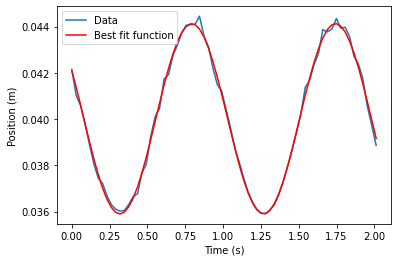

In [ ]:
best_parameters_air_2 = res_lsq_air_2['x']
fitted_function_air_2 = cos_fit_fun_1(best_parameters_air_2, time_data_array_clip1_air_2)
plt.plot(time_data_array_clip1_air_2, position_data_array_clip1_air_2, label = 'Data')
plt.plot(time_data_array_clip1_air_2, fitted_function_air_2, color = 'red', label='Best fit function')
print('Best Amplitude: ' + str(best_parameters_air_2[0]))
print('Best Omega: ' + str(best_parameters_air_2[1]))
print('Best offset: ' + str(best_parameters_air_2[2]))
print('Best Phi: ' + str(best_parameters_air_2[3]))
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')

Now, applying this to the full range of data.

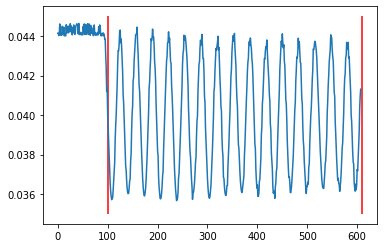

In [ ]:
# Plot vs index to see where we should cut off the data
plt.plot(position_data_array_air_2)
plt.vlines(100, 0.035, 0.045, color = 'red')
plt.vlines(610, 0.035, 0.045, color = 'red')
#plt.ylim()

In [ ]:
position_data_array_clip2_air_2 = position_data_array_air_2[130:]
time_data_array_clip2_air_2 = time_data_array_air_2[130:]
time_data_array_clip2_air_2 = time_data_array_clip2_air_2 - time_data_array_clip2_air_2[0]

See how initial best fit cimpares to full range of data.

Text(0, 0.5, 'Position (m)')

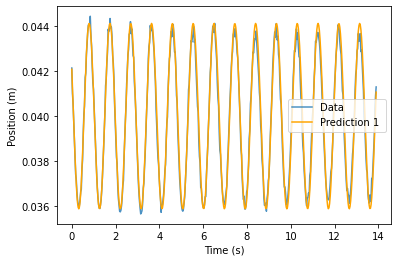

In [ ]:
guess_parameters_air_2 = best_parameters_air_2
theoretical_guess_function_air_2 = cos_fit_fun_1(guess_parameters_air_2, time_data_array_clip2_air_2)
plt.plot(time_data_array_clip2_air_2, position_data_array_clip2_air_2, alpha = 0.8, label = 'Data')
plt.plot(time_data_array_clip2_air_2, theoretical_guess_function_air_2, color='orange', label = 'Prediction 1 ')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')

In [ ]:
res_lsq_air_2 = least_squares(get_residuals, guess_parameters_air_2, args=(position_data_array_clip2_air_2,time_data_array_clip2_air_2))

Next fitted function with damping.

Best Amplitude: 0.003933379468196778
Best Omega: 6.621998352395461
Best offset: 0.03991850650761966
Best Phi: 1.032516941805865


Text(0, 0.5, 'Position (m)')

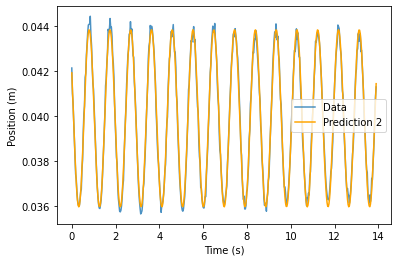

In [ ]:
best_parameters_air_2 = res_lsq_air_2['x']
fitted_function_air_2 = cos_fit_fun_1(best_parameters_air_2, time_data_array_clip2_air_2)
plt.plot(time_data_array_clip2_air_2, position_data_array_clip2_air_2, alpha = 0.8, label='Data')
plt.plot(time_data_array_clip2_air_2, fitted_function_air_2, color = 'orange', label='Prediction 2')
print('Best Amplitude: ' + str(best_parameters_air_2[0]))
print('Best Omega: ' + str(best_parameters_air_2[1]))
print('Best offset: ' + str(best_parameters_air_2[2]))
print('Best Phi: ' + str(best_parameters_air_2[3]))
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')

Functions for residuals and damping.

In [ ]:
def cos_fit_fun_damped(parameters, time):
  a = parameters[0]
  omega = parameters[1]
  offset = parameters[2]
  phi = parameters[3]
  tau = parameters[4]
  y = a * np.cos(omega * time + phi) * np.exp(-time / tau) + offset
  return y

In [ ]:
def get_residuals(parameters, position_data, time_data):
  theoretical_function = cos_fit_fun_damped(parameters, time_data)
  residuals = np.abs(theoretical_function - position_data)
  return residuals

Text(0, 0.5, 'Height')

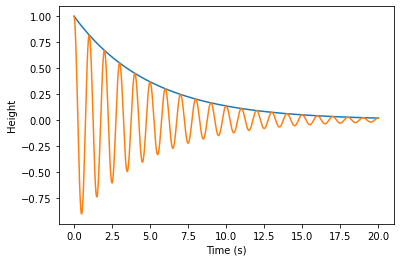

In [ ]:
time_axis_air_2 = np.linspace(0, 20., 1000)
oscillation_air_2 = np.cos(2. * np.pi * time_axis_air_2)
exponential_air_2 = np.exp(-time_axis_air_2 / 5.)
plt.plot(time_axis_air_2, exponential_air_2)
plt.xlabel('Time (s)')
plt.plot(time_axis_air_2, exponential_air_2 * oscillation_air_2)
plt.ylabel('Height')

(-0.5, 7.0)

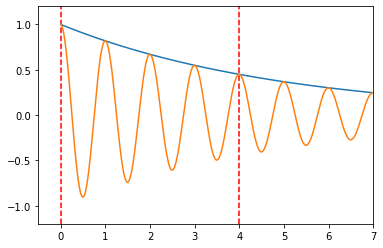

In [ ]:
time_axis_air_2 = np.linspace(0, 7., 1000)
oscillation_air_2 = np.cos(2. * np.pi * time_axis_air_2)
exponential_air_2 = np.exp(-time_axis_air_2 / 5.)
plt.plot(time_axis_air_2, exponential_air_2)
plt.plot(time_axis_air_2, exponential_air_2 * oscillation_air_2)
plt.vlines(0., -1.2, 1.2, color = 'red', linestyle = 'dashed')
plt.vlines(4., -1.2, 1.2, color = 'red', linestyle = 'dashed')
plt.ylim([-1.2, 1.2])
plt.xlim([-0.5, 7])

Best offset: 0.03991850650761966


Text(0, 0.5, 'Position (m)')

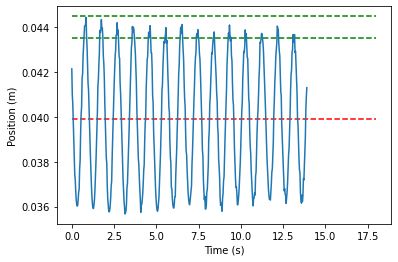

In [ ]:
best_parameters_air_2 = res_lsq_air_2['x']
plt.plot(time_data_array_clip2_air_2, position_data_array_clip2_air_2)

# To see the offset
plt.hlines(best_parameters_air_2[2],-0, 18, color = 'red', linestyle = 'dashed')
print('Best offset: ' + str(best_parameters_air_2[2]))

# To see the peak of the first cycle and the 11th cycle
plt.hlines([0.04355, 0.0445], 0, 18, color = 'green', linestyle = 'dashed')

plt.xlabel('Time (s)')
plt.ylabel('Position (m)')

Function to find tau.

In [ ]:
def find_tau(t, y_t, y_0):
  nom = t
  denom = np.log(y_0 / y_t)
  tau = nom / denom
  print('Tau is ' + str(tau))



In [ ]:
find_tau(15, .14, .2)

Tau is 42.05509878085694


In [ ]:
guess_parameters_air_2 = np.append(best_parameters_air_2, 49.0)
print(guess_parameters_air_2)

[3.93337947e-03 6.62199835e+00 3.99185065e-02 1.03251694e+00
 4.90000000e+01]


Text(0, 0.5, 'Position (m)')

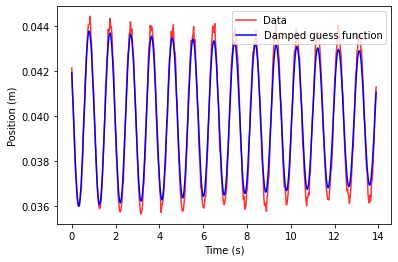

In [ ]:
theoretical_guess_function_air_2 = cos_fit_fun_damped(guess_parameters_air_2, time_data_array_clip2_air_2)
plt.plot(time_data_array_clip2_air_2, position_data_array_clip2_air_2, color = 'red', alpha = 0.8, label = 'Data')
plt.plot(time_data_array_clip2_air_2, theoretical_guess_function_air_2, color = 'blue', label = 'Damped guess function')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')

In [ ]:
def get_residuals(parameters, position_data, time_data):
  theoretical_function = cos_fit_fun_damped(parameters, time_data)
  residuals = np.abs(theoretical_function - position_data)
  return residuals

Best Amplitude: 0.004193617759403612
Best Omega: 6.6219816636564826
Best offset: 0.03991843209098855
Best Phi: 1.0323468430388627
Best Tau: 107.39625622760713


Text(0, 0.5, 'Position (m)')

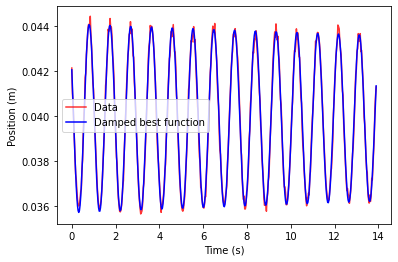

In [ ]:
res_lsq_air_2 = least_squares(get_residuals, guess_parameters_air_2, args=(position_data_array_clip2_air_2,time_data_array_clip2_air_2))
best_parameters_air_2 = res_lsq_air_2['x']
fitted_function_air_2 = cos_fit_fun_damped(best_parameters_air_2, time_data_array_clip2_air_2)
plt.plot(time_data_array_clip2_air_2, position_data_array_clip2_air_2, color='red',alpha = 0.8, label='Data')
plt.plot(time_data_array_clip2_air_2, fitted_function_air_2, color = 'blue', label = 'Damped best function' )
print('Best Amplitude: ' + str(best_parameters_air_2[0]))
print('Best Omega: ' + str(best_parameters_air_2[1]))
print('Best offset: ' + str(best_parameters_air_2[2]))
print('Best Phi: ' + str(best_parameters_air_2[3]))
print('Best Tau: ' + str(best_parameters_air_2[4]))
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')

# Air: experiment 3

In [ ]:
read_in_array_air_3 = np.loadtxt('/content/drive/MyDrive/Physics 4AL/Final Project Data/Copy of air3.txt', delimiter = ';', skiprows = 1)

In [ ]:
# Get the zeroeth column
time_data_array_air_3 = read_in_array_air_3[:, 0]

# convert from ms to s
time_data_array_air_3 = time_data_array_air_3/1000

In [ ]:
# Get the fourth column, the second and third column in the data are accelerations from the accelerometer sensor
position_data_array_air_3 = read_in_array_air_3[:, 1]

# convert from mm to m
position_data_array_air_3=position_data_array_air_3/1000

Text(0, 0.5, 'Distance (m)')

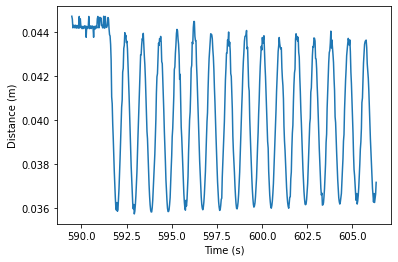

In [ ]:
import matplotlib.pyplot as plt
plt.plot(time_data_array_air_3, position_data_array_air_3)
plt.xlabel('Time (s)')
plt.ylabel('Distance (m)')

Fitting an undamped cosine function to a small portion of data, plotting position versus index. We cut to around 1.5 oscillations. This will help inform our parameters.

Text(0.5, 0, 'Index')

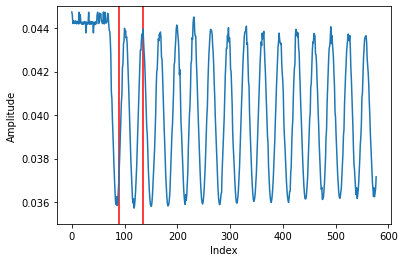

In [ ]:
plt.plot(position_data_array_air_3)
plt.vlines(90, 0.035, 0.045, color = 'red')
plt.vlines(135, 0.035, 0.045, color = 'red')
plt.ylim([0.035, 0.045])
plt.ylabel('Amplitude')
plt.xlabel('Index')

In [ ]:
position_data_array_clip1_air_3 = position_data_array_air_3[130:200]
time_data_array_clip1_air_3 = time_data_array_air_3[130:200]
time_data_array_clip1_air_3 = time_data_array_clip1_air_3 - time_data_array_clip1_air_3[0]

Text(0, 0.5, 'Amplitude')

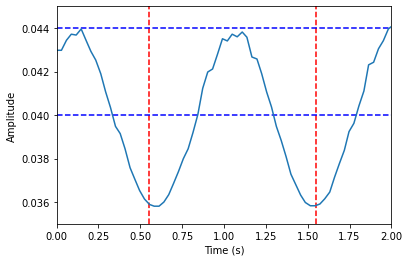

In [ ]:
plt.plot(time_data_array_clip1_air_3, position_data_array_clip1_air_3)
plt.vlines(.55, .035, 0.045, color = 'red', linestyle = 'dashed')
plt.vlines(1.55, 0.035, 0.045, color = 'red', linestyle = 'dashed')

plt.hlines(0.04, 0, 2.6,  color = 'blue', linestyle = 'dashed')
plt.hlines(0.044, 0, 2.6,  color = 'blue', linestyle = 'dashed')

plt.xlim([0, 2.0])
plt.ylim([0.035, 0.045])

plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

Use this graph to guess parameters.

In [ ]:
guess_amplitude_air_3 = 0.004
guess_omega_air_3 = 2 * np.pi / (1.4 - 0.45)
guess_offset_air_3 = 0.04 #distance to centerline
guess_phi_air_3 = -0.6

guess_parameters_air_3 = [guess_amplitude_air_3, guess_omega_air_3, guess_offset_air_3, guess_phi_air_3]

These functions will be used for fitting.

In [ ]:
def cos_fit_fun_1(parameters, time):
  a = parameters[0]
  omega = parameters[1]
  offset = parameters[2]
  phi = parameters[3]
  y = a * np.cos(omega * time + phi) + offset
  return y

In [ ]:
def get_residuals(parameters, position_data, time_data):
  theoretical_function = cos_fit_fun_1(parameters, time_data)
  residuals = np.abs(theoretical_function - position_data)
  return residuals

Text(0, 0.5, 'Position (m)')

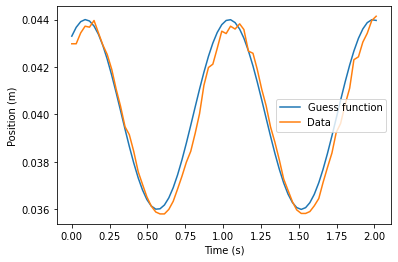

In [ ]:
theoretical_guess_function_air_3 = cos_fit_fun_1(guess_parameters_air_3, time_data_array_clip1_air_3)
plt.plot(time_data_array_clip1_air_3, theoretical_guess_function_air_3, label='Guess function')
plt.plot(time_data_array_clip1_air_3, position_data_array_clip1_air_3, label = 'Data')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')

Now, apply least square algorithm.

In [ ]:
res_lsq_air_3 = least_squares(get_residuals, guess_parameters_air_3, args=(position_data_array_clip1_air_3,time_data_array_clip1_air_3))

Best Amplitude: 0.004006582984540361
Best Omega: 6.602864520887654
Best offset: 0.03979574173957735
Best Phi: -0.7447681245438214


Text(0, 0.5, 'Position (m)')

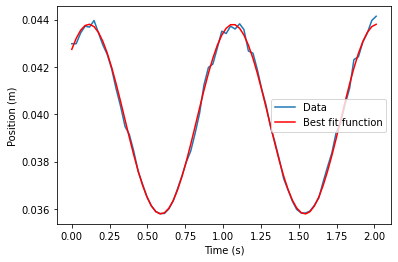

In [ ]:
best_parameters_air_3 = res_lsq_air_3['x']
fitted_function_air_3 = cos_fit_fun_1(best_parameters_air_3, time_data_array_clip1_air_3)
plt.plot(time_data_array_clip1_air_3, position_data_array_clip1_air_3, label = 'Data')
plt.plot(time_data_array_clip1_air_3, fitted_function_air_3, color = 'red', label='Best fit function')
print('Best Amplitude: ' + str(best_parameters_air_3[0]))
print('Best Omega: ' + str(best_parameters_air_3[1]))
print('Best offset: ' + str(best_parameters_air_3[2]))
print('Best Phi: ' + str(best_parameters_air_3[3]))
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')

Now, applying this to the full range of data.

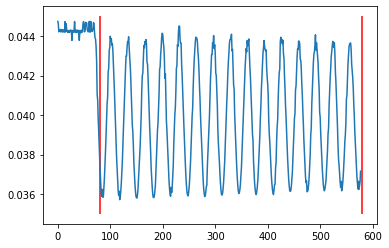

In [ ]:
# Plot vs index to see where we should cut off the data
plt.plot(position_data_array_air_3)
plt.vlines(80, 0.035, 0.045, color = 'red')
plt.vlines(580, 0.035, 0.045, color = 'red')
#plt.ylim(

In [ ]:
position_data_array_clip2_air_3 = position_data_array_air_3[130:]
time_data_array_clip2_air_3 = time_data_array_air_3[130:]
time_data_array_clip2_air_3 = time_data_array_clip2_air_3 - time_data_array_clip2_air_3[0]

See how initial best fit cimpares to full range of data.

Text(0, 0.5, 'Position (m)')

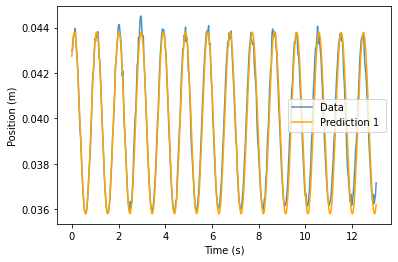

In [ ]:
guess_parameters_air_3 = best_parameters_air_3
theoretical_guess_function_air_3 = cos_fit_fun_1(guess_parameters_air_3, time_data_array_clip2_air_3)
plt.plot(time_data_array_clip2_air_3, position_data_array_clip2_air_3, alpha = 0.8, label = 'Data')
plt.plot(time_data_array_clip2_air_3, theoretical_guess_function_air_3, color='orange', label = 'Prediction 1 ')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')

In [ ]:
res_lsq_air_3 = least_squares(get_residuals, guess_parameters_air_3, args=(position_data_array_clip2_air_3,time_data_array_clip2_air_3))

Next fitted function with damping.

Best Amplitude: 0.0039095530649455815
Best Omega: 6.6256384205349566
Best offset: 0.03990469331210792
Best Phi: -0.7625521296109905


Text(0, 0.5, 'Position (m)')

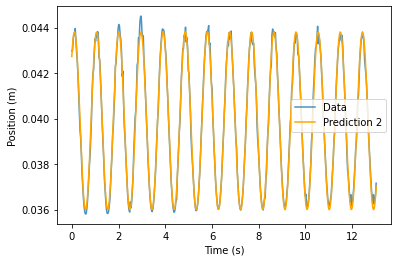

In [ ]:
best_parameters_air_3 = res_lsq_air_3['x']
fitted_function_air_3 = cos_fit_fun_1(best_parameters_air_3, time_data_array_clip2_air_3)
plt.plot(time_data_array_clip2_air_3, position_data_array_clip2_air_3, alpha = 0.8, label='Data')
plt.plot(time_data_array_clip2_air_3, fitted_function_air_3, color = 'orange', label='Prediction 2')
print('Best Amplitude: ' + str(best_parameters_air_3[0]))
print('Best Omega: ' + str(best_parameters_air_3[1]))
print('Best offset: ' + str(best_parameters_air_3[2]))
print('Best Phi: ' + str(best_parameters_air_3[3]))
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')

Functions for residuals and damping.

In [ ]:
def cos_fit_fun_damped(parameters, time):
  a = parameters[0]
  omega = parameters[1]
  offset = parameters[2]
  phi = parameters[3]
  tau = parameters[4]
  y = a * np.cos(omega * time + phi) * np.exp(-time / tau) + offset
  return y

In [ ]:
def get_residuals(parameters, position_data, time_data):
  theoretical_function = cos_fit_fun_damped(parameters, time_data)
  residuals = np.abs(theoretical_function - position_data)
  return residuals

Text(0, 0.5, 'Height')

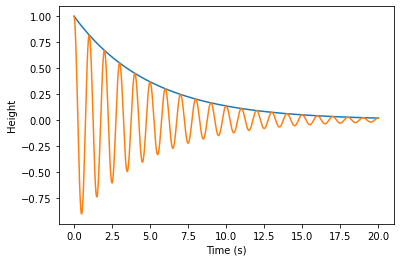

In [ ]:
time_axis_air_3 = np.linspace(0, 20., 1000)
oscillation_air_3 = np.cos(2. * np.pi * time_axis_air_3)
exponential_air_3 = np.exp(-time_axis_air_3 / 5.)
plt.plot(time_axis_air_3, exponential_air_3)
plt.xlabel('Time (s)')
plt.plot(time_axis_air_3, exponential_air_3 * oscillation_air_3)
plt.ylabel('Height')

(-0.5, 7.0)

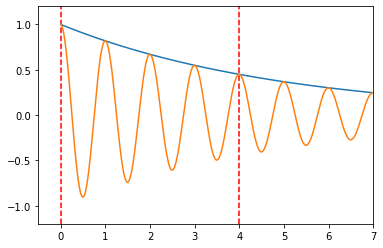

In [ ]:
time_axis_air_3 = np.linspace(0, 7., 1000)
oscillation_air_3 = np.cos(2. * np.pi * time_axis_air_3)
exponential_air_3 = np.exp(-time_axis_air_3 / 5.)
plt.plot(time_axis_air_3, exponential_air_3)
plt.plot(time_axis_air_3, exponential_air_3 * oscillation_air_3)
plt.vlines(0., -1.2, 1.2, color = 'red', linestyle = 'dashed')
plt.vlines(4., -1.2, 1.2, color = 'red', linestyle = 'dashed')
plt.ylim([-1.2, 1.2])
plt.xlim([-0.5, 7])

Best offset: 0.03990469331210792


Text(0, 0.5, 'Position (m)')

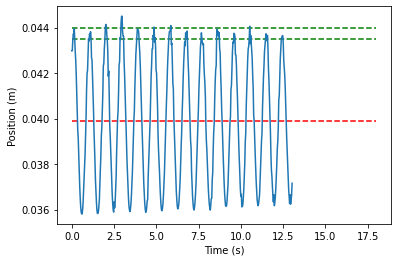

In [ ]:
best_parameters_air_3 = res_lsq_air_3['x']
plt.plot(time_data_array_clip2_air_3, position_data_array_clip2_air_3)

# To see the offset
plt.hlines(best_parameters_air_3[2],-0, 18, color = 'red', linestyle = 'dashed')
print('Best offset: ' + str(best_parameters_air_3[2]))

# To see the peak of the first cycle and the 11th cycle
plt.hlines([0.0435, 0.044], 0, 18, color = 'green', linestyle = 'dashed')

plt.xlabel('Time (s)')
plt.ylabel('Position (m)')

Function to find tau.

In [ ]:
def find_tau(t, y_t, y_0):
  nom = t
  denom = np.log(y_0 / y_t)
  tau = nom / denom
  print('Tau is ' + str(tau))



In [ ]:
find_tau(15, .14, .2)

Tau is 42.05509878085694


In [ ]:
guess_parameters_air_3 = np.append(best_parameters_air_3, 49.0)
print(guess_parameters_air_3)

[ 3.90955306e-03  6.62563842e+00  3.99046933e-02 -7.62552130e-01
  4.90000000e+01]


Text(0, 0.5, 'Position (m)')

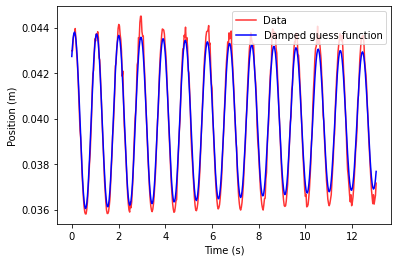

In [ ]:
theoretical_guess_function_air_3 = cos_fit_fun_damped(guess_parameters_air_3, time_data_array_clip2_air_3)
plt.plot(time_data_array_clip2_air_3, position_data_array_clip2_air_3, color = 'red', alpha = 0.8, label = 'Data')
plt.plot(time_data_array_clip2_air_3, theoretical_guess_function_air_3, color = 'blue', label = 'Damped guess function')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')

In [ ]:
def get_residuals(parameters, position_data, time_data):
  theoretical_function = cos_fit_fun_damped(parameters, time_data)
  residuals = np.abs(theoretical_function - position_data)
  return residuals

Best Amplitude: 0.004108612359994389
Best Omega: 6.62563899256287
Best offset: 0.03990123172296516
Best Phi: -0.7626618867828894
Best Tau: 130.05387324170232


Text(0, 0.5, 'Position (m)')

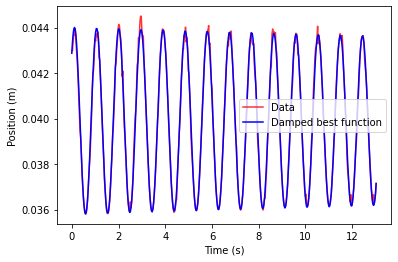

In [ ]:
res_lsq_air_3 = least_squares(get_residuals, guess_parameters_air_3, args=(position_data_array_clip2_air_3,time_data_array_clip2_air_3))
best_parameters_air_3 = res_lsq_air_3['x']
fitted_function_air_3 = cos_fit_fun_damped(best_parameters_air_3, time_data_array_clip2_air_3)
plt.plot(time_data_array_clip2_air_3, position_data_array_clip2_air_3, color='red',alpha = 0.8, label='Data')
plt.plot(time_data_array_clip2_air_3, fitted_function_air_3, color = 'blue', label = 'Damped best function' )
print('Best Amplitude: ' + str(best_parameters_air_3[0]))
print('Best Omega: ' + str(best_parameters_air_3[1]))
print('Best offset: ' + str(best_parameters_air_3[2]))
print('Best Phi: ' + str(best_parameters_air_3[3]))
print('Best Tau: ' + str(best_parameters_air_3[4]))
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')

# Water: Experiment 1

In [ ]:
read_in_array_water_1 = np.loadtxt('/content/drive/MyDrive/4AL/Final project files/Copy of water1.txt', delimiter = ';', skiprows = 1)

In [ ]:
# Get the zeroeth column
time_data_array_water_1 = read_in_array_water_1[:, 0]

# convert from ms to s
time_data_array_water_1 = time_data_array_water_1/1000

In [ ]:
# Get the second column for position data
position_data_array_water_1 = read_in_array_water_1[:, 1]

# convert from mm to m
position_data_array_water_1=position_data_array_water_1/1000

Text(0, 0.5, 'Distance (m)')

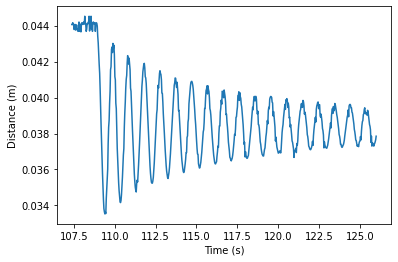

In [ ]:
plt.plot(time_data_array_water_1, position_data_array_water_1)
plt.xlabel('Time (s)')
plt.ylabel('Distance (m)')

Text(0.5, 0, 'Index')

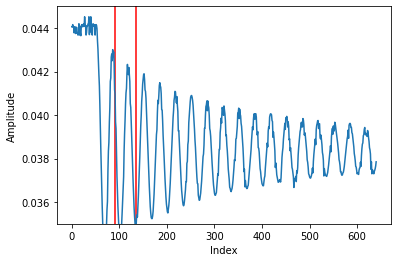

In [ ]:
plt.plot(position_data_array_water_1)
plt.vlines(90, 0.035, 0.045, color = 'red')
plt.vlines(135, 0.035, 0.045, color = 'red')
plt.ylim([0.035, 0.045])
plt.ylabel('Amplitude')
plt.xlabel('Index')


In [ ]:
position_data_array_clip1_water_1 = position_data_array_water_1[130:200]
time_data_array_clip1_water_1 = time_data_array_water_1[130:200]
time_data_array_clip1_water_1 = time_data_array_clip1_water_1 - time_data_array_clip1_water_1[0]

Text(0, 0.5, 'Amplitude')

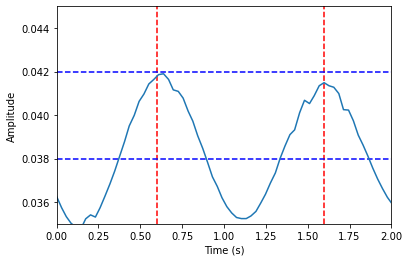

In [ ]:
plt.plot(time_data_array_clip1_water_1, position_data_array_clip1_water_1)
plt.vlines(.60, .035, 0.045, color = 'red', linestyle = 'dashed')
plt.vlines(1.60, 0.035, 0.045, color = 'red', linestyle = 'dashed')

plt.hlines(0.038, 0, 2.6,  color = 'blue', linestyle = 'dashed')
plt.hlines(0.042, 0, 2.6,  color = 'blue', linestyle = 'dashed')

plt.xlim([0, 2.0])
plt.ylim([0.035, 0.045])

plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

In [ ]:
# Use the above graph to guess parameters

guess_amplitude_water_1 = 0.004
guess_omega_water_1 = 2 * np.pi / (1.6 - 0.6)
guess_offset_water_1 = 0.038 #distance to centerline
guess_phi_water_1 = 2.4

guess_parameters_water_1 = [guess_amplitude_water_1, guess_omega_water_1, guess_offset_water_1, guess_phi_water_1]

Text(0, 0.5, 'Position (m)')

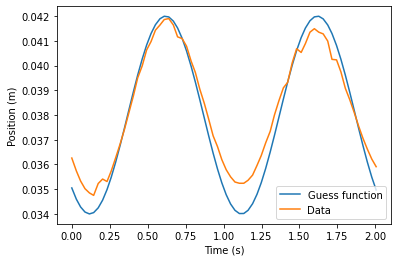

In [ ]:
theoretical_guess_function_water_1 = cos_fit_fun_1(guess_parameters_water_1, time_data_array_clip1_water_1)
plt.plot(time_data_array_clip1_water_1, theoretical_guess_function_water_1, label='Guess function')
plt.plot(time_data_array_clip1_water_1, position_data_array_clip1_water_1, label = 'Data')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')

In [ ]:
res_lsq_water_1 = least_squares(get_residuals, guess_parameters_water_1, args=(position_data_array_clip1_water_1,time_data_array_clip1_water_1))

Best Amplitude: 0.0032337104084328686
Best Omega: 6.44258738377018
Best offset: 0.03834357996953973
Best Phi: 2.2290406469481066


Text(0, 0.5, 'Position (m)')

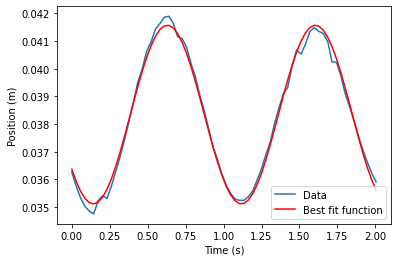

In [ ]:
best_parameters_water_1 = res_lsq_water_1['x']
fitted_function_water_1 = cos_fit_fun_1(best_parameters_water_1, time_data_array_clip1_water_1)
plt.plot(time_data_array_clip1_water_1, position_data_array_clip1_water_1, label = 'Data')
plt.plot(time_data_array_clip1_water_1, fitted_function_water_1, color = 'red', label='Best fit function')
print('Best Amplitude: ' + str(best_parameters_water_1[0]))
print('Best Omega: ' + str(best_parameters_water_1[1]))
print('Best offset: ' + str(best_parameters_water_1[2]))
print('Best Phi: ' + str(best_parameters_water_1[3]))
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')

Now applying this to the entire curve

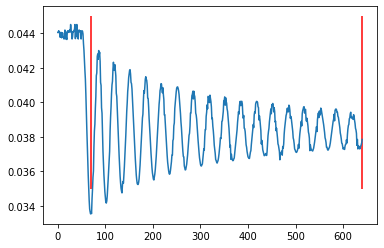

In [ ]:

plt.plot(position_data_array_water_1)
plt.vlines(70, 0.035, 0.045, color = 'red')
plt.vlines(640, 0.035, 0.045, color = 'red')

In [ ]:
position_data_array_clip2_water_1 = position_data_array_water_1[130:]
time_data_array_clip2_water_1 = time_data_array_water_1[130:]
time_data_array_clip2_water_1 = time_data_array_clip2_water_1 - time_data_array_clip2_water_1[0]

See how initial best fit cimpares to full range of data.

Text(0, 0.5, 'Position (m)')

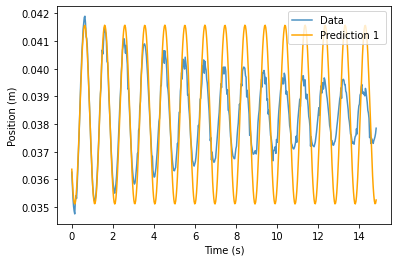

In [ ]:
guess_parameters_water_1 = best_parameters_water_1
theoretical_guess_function_water_1 = cos_fit_fun_1(guess_parameters_water_1, time_data_array_clip2_water_1)
plt.plot(time_data_array_clip2_water_1, position_data_array_clip2_water_1, alpha = 0.8, label = 'Data')
plt.plot(time_data_array_clip2_water_1, theoretical_guess_function_water_1, color='orange', label = 'Prediction 1 ')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')

In [ ]:
res_lsq_water_1 = least_squares(get_residuals, guess_parameters_water_1, args=(position_data_array_clip2_water_1,time_data_array_clip2_water_1))

Next, fitted function with damping

Best Amplitude: 0.0018812597094420654
Best Omega: 6.4870697955832695
Best offset: 0.0383685478212001
Best Phi: 2.1859802243523885


Text(0, 0.5, 'Position (m)')

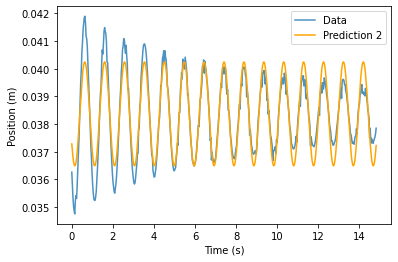

In [ ]:
best_parameters_water_1 = res_lsq_water_1['x']
fitted_function_water_1 = cos_fit_fun_1(best_parameters_water_1, time_data_array_clip2_water_1)
plt.plot(time_data_array_clip2_water_1, position_data_array_clip2_water_1, alpha = 0.8, label='Data')
plt.plot(time_data_array_clip2_water_1, fitted_function_water_1, color = 'orange', label='Prediction 2')
print('Best Amplitude: ' + str(best_parameters_water_1[0]))
print('Best Omega: ' + str(best_parameters_water_1[1]))
print('Best offset: ' + str(best_parameters_water_1[2]))
print('Best Phi: ' + str(best_parameters_water_1[3]))
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')

Functions for residuals and damping.

In [ ]:
def cos_fit_fun_damped(parameters, time):
  a = parameters[0]
  omega = parameters[1]
  offset = parameters[2]
  phi = parameters[3]
  tau = parameters[4]
  y = a * np.cos(omega * time + phi) * np.exp(-time / tau) + offset
  return y

In [ ]:
def get_residuals(parameters, position_data, time_data):
  theoretical_function = cos_fit_fun_damped(parameters, time_data)
  residuals = np.abs(theoretical_function - position_data)
  return residuals

Text(0, 0.5, 'Height')

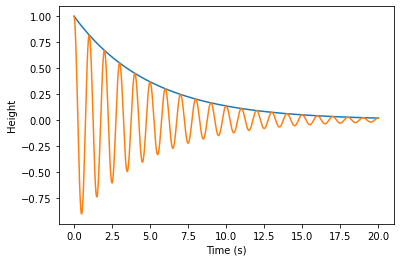

In [ ]:
time_axis_water_1 = np.linspace(0, 20., 1000)
oscillation_water_1 = np.cos(2. * np.pi * time_axis_water_1)
exponential_water_1 = np.exp(-time_axis_water_1 / 5.)
plt.plot(time_axis_water_1, exponential_water_1)
plt.xlabel('Time (s)')
plt.plot(time_axis_water_1, exponential_water_1 * oscillation_water_1)
plt.ylabel('Height')

(-0.5, 7.0)

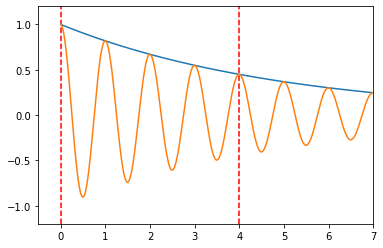

In [ ]:
time_axis_water_1 = np.linspace(0, 7., 1000)
oscillation_water_1 = np.cos(2. * np.pi * time_axis_water_1)
exponential_water_1 = np.exp(-time_axis_water_1 / 5.)
plt.plot(time_axis_water_1, exponential_water_1)
plt.plot(time_axis_water_1, exponential_water_1 * oscillation_water_1)
plt.vlines(0., -1.2, 1.2, color = 'red', linestyle = 'dashed')
plt.vlines(4., -1.2, 1.2, color = 'red', linestyle = 'dashed')
plt.ylim([-1.2, 1.2])
plt.xlim([-0.5, 7])

Best offset: 0.0383685478212001


Text(0, 0.5, 'Position (m)')

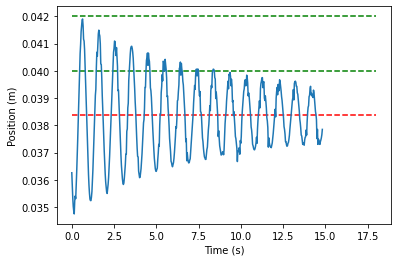

In [ ]:
best_parameters_water_1 = res_lsq_water_1['x']
plt.plot(time_data_array_clip2_water_1, position_data_array_clip2_water_1)

# To see the offset
plt.hlines(best_parameters_water_1[2],-0, 18, color = 'red', linestyle = 'dashed')
print('Best offset: ' + str(best_parameters_water_1[2]))

# To see the peak of the first cycle and the 11th cycle
plt.hlines([0.042, 0.04], 0, 18, color = 'green', linestyle = 'dashed')

plt.xlabel('Time (s)')
plt.ylabel('Position (m)')

In [ ]:
def find_tau(t, y_t, y_0):
  nom = t
  denom = np.log(y_0 / y_t)
  tau = nom / denom
  print('Tau is ' + str(tau))

In [ ]:
find_tau(15, .14, .2)

Tau is 42.05509878085694


In [ ]:
guess_parameters_water_1 = np.append(best_parameters_water_1, 49.0)
print(guess_parameters_water_1)

[1.88125971e-03 6.48706980e+00 3.83685478e-02 2.18598022e+00
 4.90000000e+01]


Text(0, 0.5, 'Position (m)')

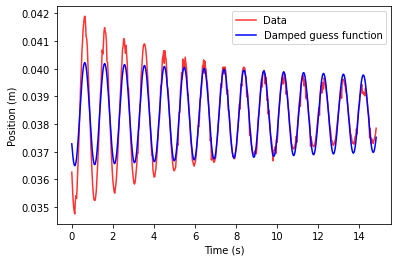

In [ ]:
theoretical_guess_function_water_1 = cos_fit_fun_damped(guess_parameters_water_1, time_data_array_clip2_water_1)
plt.plot(time_data_array_clip2_water_1, position_data_array_clip2_water_1, color = 'red', alpha = 0.8, label = 'Data')
plt.plot(time_data_array_clip2_water_1, theoretical_guess_function_water_1, color = 'blue', label = 'Damped guess function')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')

In [ ]:
def get_residuals(parameters, position_data, time_data):
  theoretical_function = cos_fit_fun_damped(parameters, time_data)
  residuals = np.abs(theoretical_function - position_data)
  return residuals

Best Amplitude: 0.0034251603077663437
Best Omega: 6.48660166651798
Best offset: 0.03837430530876983
Best Phi: 2.1848426123713387
Best Tau: 10.914662484497416


Text(0, 0.5, 'Position (m)')

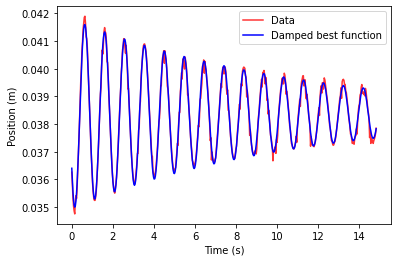

In [ ]:
res_lsq_water_1 = least_squares(get_residuals, guess_parameters_water_1, args=(position_data_array_clip2_water_1,time_data_array_clip2_water_1))
best_parameters_water_1 = res_lsq_water_1['x']
fitted_function_water_1 = cos_fit_fun_damped(best_parameters_water_1, time_data_array_clip2_water_1)
plt.plot(time_data_array_clip2_water_1, position_data_array_clip2_water_1, color='red',alpha = 0.8, label='Data')
plt.plot(time_data_array_clip2_water_1, fitted_function_water_1, color = 'blue', label = 'Damped best function' )
print('Best Amplitude: ' + str(best_parameters_water_1[0]))
print('Best Omega: ' + str(best_parameters_water_1[1]))
print('Best offset: ' + str(best_parameters_water_1[2]))
print('Best Phi: ' + str(best_parameters_water_1[3]))
print('Best Tau: ' + str(best_parameters_water_1[4]))
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')

# Water: Experiment 2

In [ ]:
read_in_array_water_2 = np.loadtxt('/content/drive/MyDrive/4AL/Final project files/Copy of water2.txt', delimiter = ';', skiprows = 1)

In [ ]:
# Get the zeroeth column
time_data_array_water_2 = read_in_array_water_2[:, 0]

# convert from ms to s
time_data_array_water_2 = time_data_array_water_2/1000

In [ ]:
# Get the second column for position data
position_data_array_water_2 = read_in_array_water_2[:, 1]

# convert from mm to m
position_data_array_water_2=position_data_array_water_2/1000

Text(0, 0.5, 'Distance (m)')

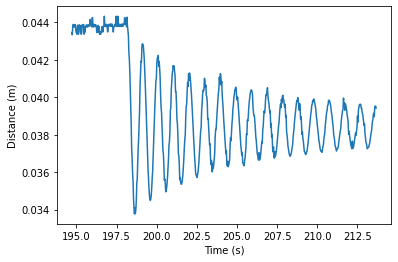

In [ ]:
plt.plot(time_data_array_water_2, position_data_array_water_2)
plt.xlabel('Time (s)')
plt.ylabel('Distance (m)')

Text(0.5, 0, 'Index')

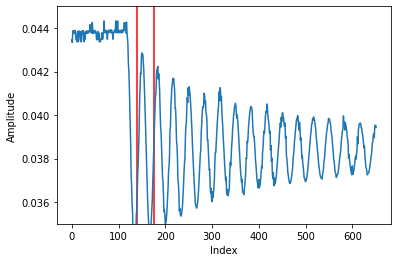

In [ ]:
plt.plot(position_data_array_water_2)
plt.vlines(140, 0.035, 0.045, color = 'red')
plt.vlines(175, 0.035, 0.045, color = 'red')
plt.ylim([0.035, 0.045])
plt.ylabel('Amplitude')
plt.xlabel('Index')


In [ ]:
position_data_array_clip1_water_2 = position_data_array_water_2[130:200]
time_data_array_clip1_water_2 = time_data_array_water_2[130:200]
time_data_array_clip1_water_2 = time_data_array_clip1_water_2 - time_data_array_clip1_water_2[0]

Text(0, 0.5, 'Amplitude')

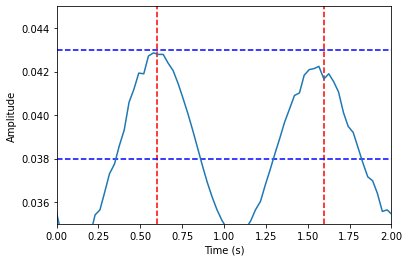

In [ ]:
plt.plot(time_data_array_clip1_water_2, position_data_array_clip1_water_2)
plt.vlines(.60, .035, 0.045, color = 'red', linestyle = 'dashed')
plt.vlines(1.60, 0.035, 0.045, color = 'red', linestyle = 'dashed')

plt.hlines(0.038, 0, 2.6,  color = 'blue', linestyle = 'dashed')
plt.hlines(0.043, 0, 2.6,  color = 'blue', linestyle = 'dashed')

plt.xlim([0, 2.0])
plt.ylim([0.035, 0.045])

plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

In [ ]:
# Use the above graph to guess parameters

guess_amplitude_water_2 = 0.004
guess_omega_water_2 = 2 * np.pi / (1.6 - 0.6)
guess_offset_water_2 = 0.038 #distance to centerline
guess_phi_water_2 = 2.6

guess_parameters_water_2 = [guess_amplitude_water_2, guess_omega_water_2, guess_offset_water_2, guess_phi_water_2]

Text(0, 0.5, 'Position (m)')

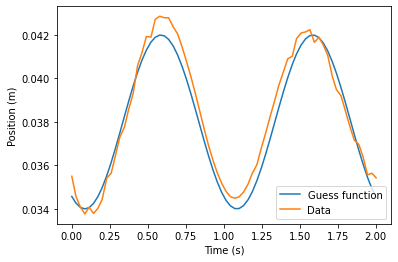

In [ ]:
theoretical_guess_function_water_2 = cos_fit_fun_1(guess_parameters_water_2, time_data_array_clip1_water_2)
plt.plot(time_data_array_clip1_water_2, theoretical_guess_function_water_2, label='Guess function')
plt.plot(time_data_array_clip1_water_2, position_data_array_clip1_water_2, label = 'Data')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')

These functions will be used for fitting.

In [ ]:
def cos_fit_fun_1(parameters, time):
  a = parameters[0]
  omega = parameters[1]
  offset = parameters[2]
  phi = parameters[3]
  y = a * np.cos(omega * time + phi) + offset
  return y

In [ ]:
def get_residuals(parameters, position_data, time_data):
  theoretical_function = cos_fit_fun_1(parameters, time_data)
  residuals = np.abs(theoretical_function - position_data)
  return residuals

In [ ]:
res_lsq_water_2 = least_squares(get_residuals, guess_parameters_water_2, args=(position_data_array_clip1_water_2,time_data_array_clip1_water_2))

Best Amplitude: 0.004051702456605539
Best Omega: 6.5258539635791495
Best offset: 0.03845194011222427
Best Phi: 2.362069366527986


Text(0, 0.5, 'Position (m)')

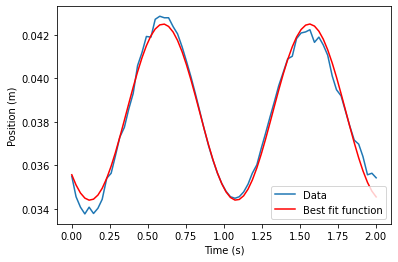

In [ ]:
best_parameters_water_2 = res_lsq_water_2['x']
fitted_function_water_2 = cos_fit_fun_1(best_parameters_water_2, time_data_array_clip1_water_2)
plt.plot(time_data_array_clip1_water_2, position_data_array_clip1_water_2, label = 'Data')
plt.plot(time_data_array_clip1_water_2, fitted_function_water_2, color = 'red', label='Best fit function')
print('Best Amplitude: ' + str(best_parameters_water_2[0]))
print('Best Omega: ' + str(best_parameters_water_2[1]))
print('Best offset: ' + str(best_parameters_water_2[2]))
print('Best Phi: ' + str(best_parameters_water_2[3]))
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')

Now applying this to the entire curve

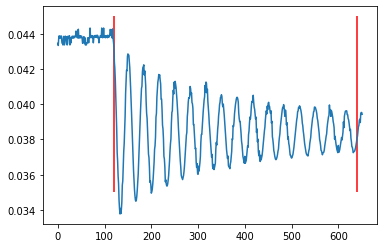

In [ ]:

plt.plot(position_data_array_water_2)
plt.vlines(120, 0.035, 0.045, color = 'red')
plt.vlines(640, 0.035, 0.045, color = 'red')

In [ ]:
position_data_array_clip2_water_2 = position_data_array_water_2[130:]
time_data_array_clip2_water_2 = time_data_array_water_2[130:]
time_data_array_clip2_water_2 = time_data_array_clip2_water_2 - time_data_array_clip2_water_2[0]

See how initial best fit cimpares to full range of data.

Text(0, 0.5, 'Position (m)')

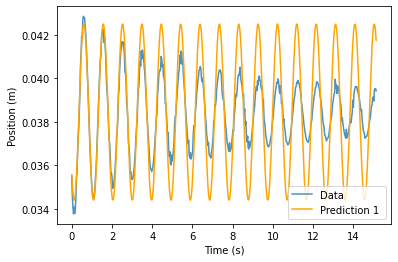

In [ ]:
guess_parameters_water_2 = best_parameters_water_2
theoretical_guess_function_water_2 = cos_fit_fun_1(guess_parameters_water_2, time_data_array_clip2_water_2)
plt.plot(time_data_array_clip2_water_2, position_data_array_clip2_water_2, alpha = 0.8, label = 'Data')
plt.plot(time_data_array_clip2_water_2, theoretical_guess_function_water_2, color='orange', label = 'Prediction 1 ')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')

In [ ]:
res_lsq_water_2 = least_squares(get_residuals, guess_parameters_water_2, args=(position_data_array_clip2_water_2,time_data_array_clip2_water_2))

Next, fitted function with damping

Best Amplitude: 0.0021588653390243336
Best Omega: 6.491197016202594
Best offset: 0.03841795641613197
Best Phi: 2.435225625034326


Text(0, 0.5, 'Position (m)')

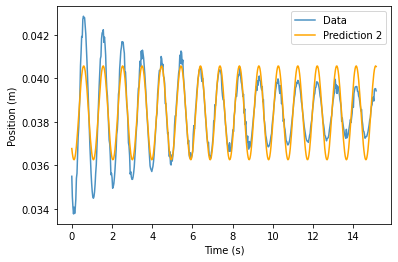

In [ ]:
best_parameters_water_2 = res_lsq_water_2['x']
fitted_function_water_2 = cos_fit_fun_1(best_parameters_water_2, time_data_array_clip2_water_2)
plt.plot(time_data_array_clip2_water_2, position_data_array_clip2_water_2, alpha = 0.8, label='Data')
plt.plot(time_data_array_clip2_water_2, fitted_function_water_2, color = 'orange', label='Prediction 2')
print('Best Amplitude: ' + str(best_parameters_water_2[0]))
print('Best Omega: ' + str(best_parameters_water_2[1]))
print('Best offset: ' + str(best_parameters_water_2[2]))
print('Best Phi: ' + str(best_parameters_water_2[3]))
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')

Functions for residuals and damping.

In [ ]:
def cos_fit_fun_damped(parameters, time):
  a = parameters[0]
  omega = parameters[1]
  offset = parameters[2]
  phi = parameters[3]
  tau = parameters[4]
  y = a * np.cos(omega * time + phi) * np.exp(-time / tau) + offset
  return y

In [ ]:
def get_residuals(parameters, position_data, time_data):
  theoretical_function = cos_fit_fun_damped(parameters, time_data)
  residuals = np.abs(theoretical_function - position_data)
  return residuals

Text(0, 0.5, 'Height')

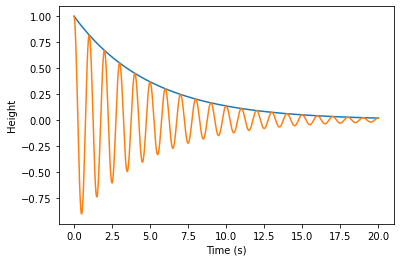

In [ ]:
time_axis_water_2 = np.linspace(0, 20., 1000)
oscillation_water_2 = np.cos(2. * np.pi * time_axis_water_2)
exponential_water_2 = np.exp(-time_axis_water_2 / 5.)
plt.plot(time_axis_water_2, exponential_water_2)
plt.xlabel('Time (s)')
plt.plot(time_axis_water_2, exponential_water_2 * oscillation_water_2)
plt.ylabel('Height')

(-0.5, 7.0)

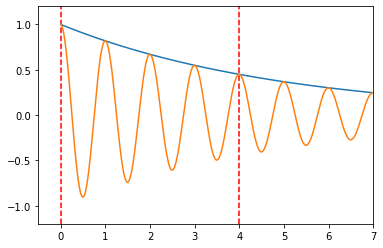

In [ ]:
time_axis_water_2 = np.linspace(0, 7., 1000)
oscillation_water_2 = np.cos(2. * np.pi * time_axis_water_2)
exponential_water_2 = np.exp(-time_axis_water_2 / 5.)
plt.plot(time_axis_water_2, exponential_water_2)
plt.plot(time_axis_water_2, exponential_water_2 * oscillation_water_2)
plt.vlines(0., -1.2, 1.2, color = 'red', linestyle = 'dashed')
plt.vlines(4., -1.2, 1.2, color = 'red', linestyle = 'dashed')
plt.ylim([-1.2, 1.2])
plt.xlim([-0.5, 7])

Best offset: 0.03841795641613197


Text(0, 0.5, 'Position (m)')

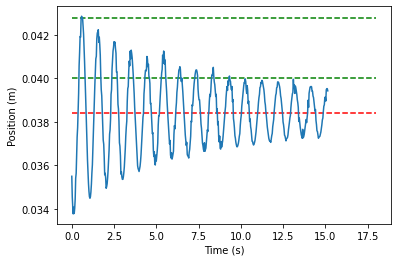

In [ ]:
best_parameters_water_2 = res_lsq_water_2['x']
plt.plot(time_data_array_clip2_water_2, position_data_array_clip2_water_2)

# To see the offset
plt.hlines(best_parameters_water_2[2],-0, 18, color = 'red', linestyle = 'dashed')
print('Best offset: ' + str(best_parameters_water_2[2]))

# To see the peak of the first cycle and the 11th cycle
plt.hlines([0.0428, 0.04], 0, 18, color = 'green', linestyle = 'dashed')

plt.xlabel('Time (s)')
plt.ylabel('Position (m)')

In [ ]:
def find_tau(t, y_t, y_0):
  nom = t
  denom = np.log(y_0 / y_t)
  tau = nom / denom
  print('Tau is ' + str(tau))

In [ ]:
find_tau(15, .14, .2)

Tau is 42.05509878085694


In [ ]:
guess_parameters_water_2 = np.append(best_parameters_water_2, 49.0)
print(guess_parameters_water_2)

[2.15886534e-03 6.49119702e+00 3.84179564e-02 2.43522563e+00
 4.90000000e+01]


Text(0, 0.5, 'Position (m)')

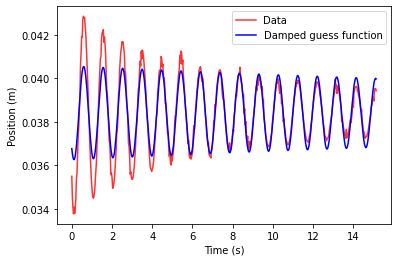

In [ ]:
theoretical_guess_function_water_2 = cos_fit_fun_damped(guess_parameters_water_2, time_data_array_clip2_water_2)
plt.plot(time_data_array_clip2_water_2, position_data_array_clip2_water_2, color = 'red', alpha = 0.8, label = 'Data')
plt.plot(time_data_array_clip2_water_2, theoretical_guess_function_water_2, color = 'blue', label = 'Damped guess function')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')

In [ ]:
def get_residuals(parameters, position_data, time_data):
  theoretical_function = cos_fit_fun_damped(parameters, time_data)
  residuals = np.abs(theoretical_function - position_data)
  return residuals

Best Amplitude: 0.004304726431678384
Best Omega: 6.495622140657085
Best offset: 0.03843892910689132
Best Phi: 2.414422866769226
Best Tau: 9.385433968092448


Text(0, 0.5, 'Position (m)')

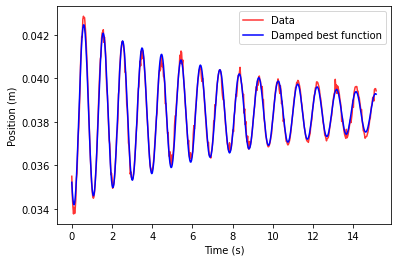

In [ ]:
res_lsq_water_2 = least_squares(get_residuals, guess_parameters_water_2, args=(position_data_array_clip2_water_2,time_data_array_clip2_water_2))
best_parameters_water_2 = res_lsq_water_2['x']
fitted_function_water_2 = cos_fit_fun_damped(best_parameters_water_2, time_data_array_clip2_water_2)
plt.plot(time_data_array_clip2_water_2, position_data_array_clip2_water_2, color='red',alpha = 0.8, label='Data')
plt.plot(time_data_array_clip2_water_2, fitted_function_water_2, color = 'blue', label = 'Damped best function' )
print('Best Amplitude: ' + str(best_parameters_water_2[0]))
print('Best Omega: ' + str(best_parameters_water_2[1]))
print('Best offset: ' + str(best_parameters_water_2[2]))
print('Best Phi: ' + str(best_parameters_water_2[3]))
print('Best Tau: ' + str(best_parameters_water_2[4]))
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')

# Water: Experiment 3

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import least_squares
drive.mount("drive", force_remount=True)

Mounted at drive


In [ ]:
read_in_array_water_3 = np.loadtxt('/content/drive/MyDrive/4AL/Final project files/Copy of water3.txt', delimiter = ';', skiprows = 1)

In [ ]:
# Get the zeroeth column
time_data_array_water_3 = read_in_array_water_3[:, 0]

# convert from ms to s
time_data_array_water_3 = time_data_array_water_3/1000

In [ ]:
# Get the second column for position data
position_data_array_water_3 = read_in_array_water_3[:, 1]

# convert from mm to m
position_data_array_water_3=position_data_array_water_3/1000

Text(0, 0.5, 'Distance (m)')

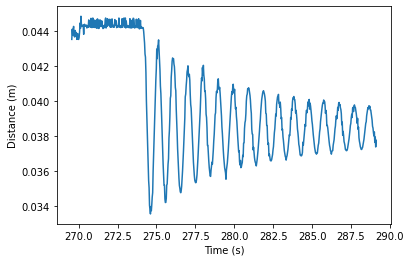

In [ ]:
plt.plot(time_data_array_water_3, position_data_array_water_3)
plt.xlabel('Time (s)')
plt.ylabel('Distance (m)')

Text(0.5, 0, 'Index')

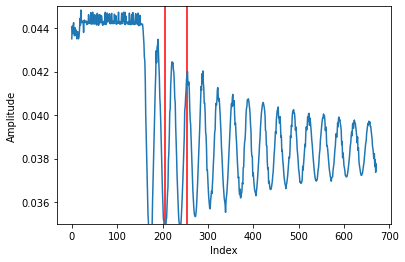

In [ ]:
plt.plot(position_data_array_water_3)
plt.vlines(205, 0.035, 0.045, color = 'red')
plt.vlines(255, 0.035, 0.045, color = 'red')
plt.ylim([0.035, 0.045])
plt.ylabel('Amplitude')
plt.xlabel('Index')


In [ ]:
position_data_array_clip1_water_3 = position_data_array_water_3[205:255]
time_data_array_clip1_water_3 = time_data_array_water_3[205:255]
time_data_array_clip1_water_3 = time_data_array_clip1_water_3 - time_data_array_clip1_water_3[0]

Text(0, 0.5, 'Amplitude')

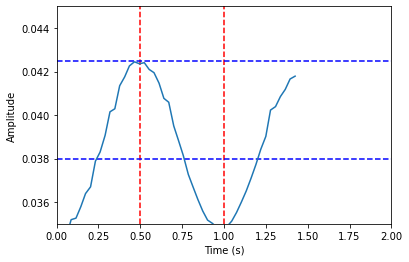

In [ ]:
plt.plot(time_data_array_clip1_water_3, position_data_array_clip1_water_3)
plt.vlines(0.50, .035, 0.045, color = 'red', linestyle = 'dashed')
plt.vlines(1, 0.035, 0.045, color = 'red', linestyle = 'dashed')

plt.hlines(0.038, 0, 2.6,  color = 'blue', linestyle = 'dashed')
plt.hlines(0.0425, 0, 2.6,  color = 'blue', linestyle = 'dashed')

plt.xlim([0, 2.0])
plt.ylim([0.035, 0.045])

plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

In [ ]:
# Use the above graph to guess parameters

guess_amplitude_water_3 = 0.005
guess_omega_water_3 = 2 * np.pi / (1.5 - 0.5)
guess_offset_water_3 = 0.038 #distance to centerline
guess_phi_water_3 = 3.2

guess_parameters_water_3 = [guess_amplitude_water_3, guess_omega_water_3, guess_offset_water_3, guess_phi_water_3]

In [ ]:
from scipy.optimize import least_squares

guess_amplitude = .2
guess_omega = 2 * np.pi / (2.5 - .8)
guess_offset = 1.2
guess_phi = 0.2

guess_parameters = [guess_amplitude, guess_omega, guess_offset, guess_phi]

In [ ]:
def cos_fit_fun_1(parameters, time):
  a = parameters[0]
  omega = parameters[1]
  offset = parameters[2]
  phi = parameters[3]
  y = a * np.cos(omega * time + phi) + offset
  return y

In [ ]:
def get_residuals(parameters, position_data, time_data):
  theoretical_function = cos_fit_fun_1(parameters, time_data)
  residuals = np.abs(theoretical_function - position_data)
  return residuals

Text(0, 0.5, 'Position (m)')

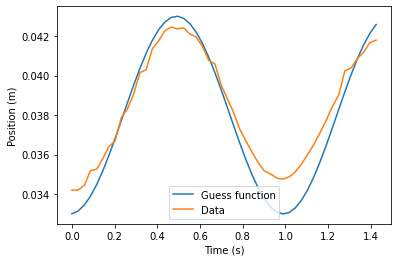

In [ ]:
theoretical_guess_function_water_3 = cos_fit_fun_1(guess_parameters_water_3, time_data_array_clip1_water_3)
plt.plot(time_data_array_clip1_water_3, theoretical_guess_function_water_3, label='Guess function')
plt.plot(time_data_array_clip1_water_3, position_data_array_clip1_water_3, label = 'Data')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')

These functions will be used for fitting.

In [ ]:
def cos_fit_fun_1(parameters, time):
  a = parameters[0]
  omega = parameters[1]
  offset = parameters[2]
  phi = parameters[3]
  y = a * np.cos(omega * time + phi) + offset
  return y

In [ ]:
def get_residuals(parameters, position_data, time_data):
  theoretical_function = cos_fit_fun_1(parameters, time_data)
  residuals = np.abs(theoretical_function - position_data)
  return residuals

In [ ]:
res_lsq_water_3 = least_squares(get_residuals, guess_parameters_water_3, args=(position_data_array_clip1_water_3,time_data_array_clip1_water_3))

Best Amplitude: 0.0038517553047042402
Best Omega: 6.535169895161638
Best offset: 0.038487354134735405
Best Phi: 3.0002842235112217


Text(0, 0.5, 'Position (m)')

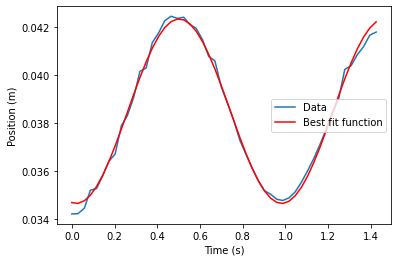

In [ ]:
best_parameters_water_3 = res_lsq_water_3['x']
fitted_function_water_3 = cos_fit_fun_1(best_parameters_water_3, time_data_array_clip1_water_3)
plt.plot(time_data_array_clip1_water_3, position_data_array_clip1_water_3, label = 'Data')
plt.plot(time_data_array_clip1_water_3, fitted_function_water_3, color = 'red', label='Best fit function')
print('Best Amplitude: ' + str(best_parameters_water_3[0]))
print('Best Omega: ' + str(best_parameters_water_3[1]))
print('Best offset: ' + str(best_parameters_water_3[2]))
print('Best Phi: ' + str(best_parameters_water_3[3]))
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')

Now applying this to the entire curve

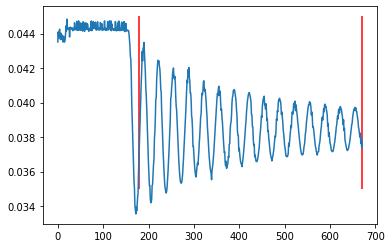

In [ ]:

plt.plot(position_data_array_water_3)
plt.vlines(180, 0.035, 0.045, color = 'red')
plt.vlines(670, 0.035, 0.045, color = 'red')

In [ ]:
position_data_array_clip2_water_3 = position_data_array_water_3[140:]
time_data_array_clip2_water_3 = time_data_array_water_3[140:]
time_data_array_clip2_water_3 = time_data_array_clip2_water_3 - time_data_array_clip2_water_3[0]

See how initial best fit cimpares to full range of data.

Text(0, 0.5, 'Position (m)')

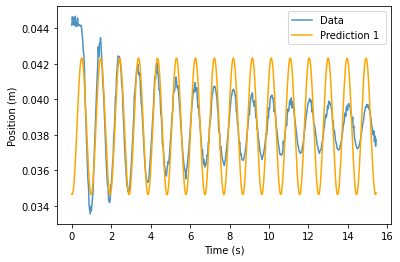

In [ ]:
guess_parameters_water_3 = best_parameters_water_3
theoretical_guess_function_water_3 = cos_fit_fun_1(guess_parameters_water_3, time_data_array_clip2_water_3)
plt.plot(time_data_array_clip2_water_3, position_data_array_clip2_water_3, alpha = 0.8, label = 'Data')
plt.plot(time_data_array_clip2_water_3, theoretical_guess_function_water_3, color='orange', label = 'Prediction 1 ')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')

In [ ]:
res_lsq_water_3 = least_squares(get_residuals, guess_parameters_water_3, args=(position_data_array_clip2_water_3,time_data_array_clip2_water_3))

Next, fitted function with damping

Best Amplitude: 0.0038517553047042402
Best Omega: 6.535169895161638
Best offset: 0.038487354134735405
Best Phi: 3.0002842235112217


Text(0, 0.5, 'Position (m)')

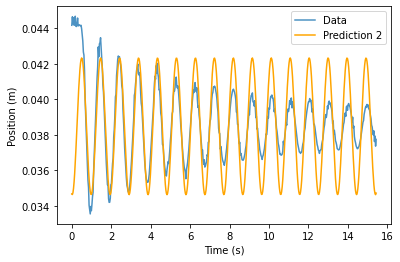

In [ ]:
best_parameters_water_3 = res_lsq_water_3['x']
fitted_function_water_3 = cos_fit_fun_1(best_parameters_water_3, time_data_array_clip2_water_3)
plt.plot(time_data_array_clip2_water_3, position_data_array_clip2_water_3, alpha = 0.8, label='Data')
plt.plot(time_data_array_clip2_water_3, fitted_function_water_3, color = 'orange', label='Prediction 2')
print('Best Amplitude: ' + str(best_parameters_water_3[0]))
print('Best Omega: ' + str(best_parameters_water_3[1]))
print('Best offset: ' + str(best_parameters_water_3[2]))
print('Best Phi: ' + str(best_parameters_water_3[3]))
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')

Functions for residuals and damping.

In [ ]:
def cos_fit_fun_damped(parameters, time):
  a = parameters[0]
  omega = parameters[1]
  offset = parameters[2]
  phi = parameters[3]
  tau = parameters[4]
  y = a * np.cos(omega * time + phi) * np.exp(-time / tau) + offset
  return y

In [ ]:
def get_residuals(parameters, position_data, time_data):
  theoretical_function = cos_fit_fun_damped(parameters, time_data)
  residuals = np.abs(theoretical_function - position_data)
  return residuals

Text(0, 0.5, 'Height')

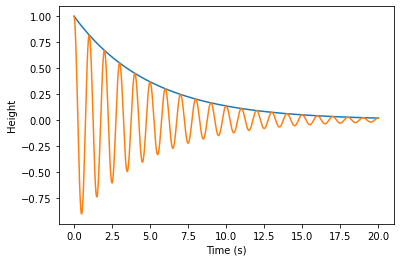

In [ ]:
time_axis_water_3 = np.linspace(0, 20., 1000)
oscillation_water_3 = np.cos(2. * np.pi * time_axis_water_3)
exponential_water_3 = np.exp(-time_axis_water_3 / 5.)
plt.plot(time_axis_water_3, exponential_water_3)
plt.xlabel('Time (s)')
plt.plot(time_axis_water_3, exponential_water_3 * oscillation_water_3)
plt.ylabel('Height')

(-0.5, 7.0)

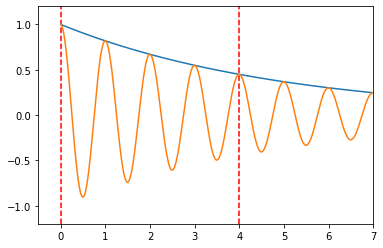

In [ ]:
time_axis_water_3 = np.linspace(0, 7., 1000)
oscillation_water_3 = np.cos(2. * np.pi * time_axis_water_3)
exponential_water_3 = np.exp(-time_axis_water_3 / 5.)
plt.plot(time_axis_water_3, exponential_water_3)
plt.plot(time_axis_water_3, exponential_water_3 * oscillation_water_3)
plt.vlines(0., -1.2, 1.2, color = 'red', linestyle = 'dashed')
plt.vlines(4., -1.2, 1.2, color = 'red', linestyle = 'dashed')
plt.ylim([-1.2, 1.2])
plt.xlim([-0.5, 7])

Best offset: 0.038487354134735405


Text(0, 0.5, 'Position (m)')

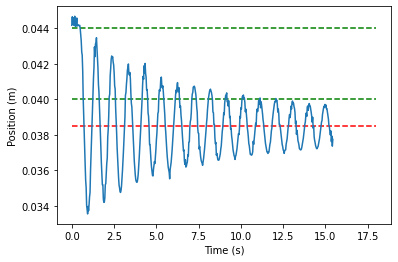

In [ ]:
best_parameters_water_3 = res_lsq_water_3['x']
plt.plot(time_data_array_clip2_water_3, position_data_array_clip2_water_3)

# To see the offset
plt.hlines(best_parameters_water_3[2],-0, 18, color = 'red', linestyle = 'dashed')
print('Best offset: ' + str(best_parameters_water_3[2]))

# To see the peak of the first cycle and the 11th cycle
plt.hlines([0.044, 0.04], 0, 18, color = 'green', linestyle = 'dashed')

plt.xlabel('Time (s)')
plt.ylabel('Position (m)')

In [ ]:
def find_tau(t, y_t, y_0):
  nom = t
  denom = np.log(y_0 / y_t)
  tau = nom / denom
  print('Tau is ' + str(tau))

In [ ]:
find_tau(12, .002, 0.0055)

Tau is 11.862385513363392


In [ ]:
guess_parameters_water_3 = np.append(best_parameters_water_3, 49.0)
print(guess_parameters_water_3)

[3.85175530e-03 6.53516990e+00 3.84873541e-02 3.00028422e+00
 4.90000000e+01]


Text(0, 0.5, 'Position (m)')

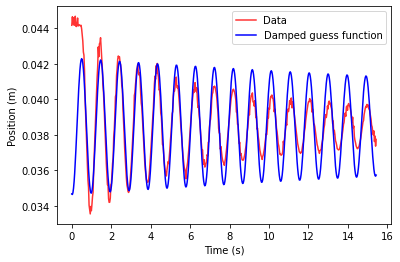

In [ ]:
theoretical_guess_function_water_3 = cos_fit_fun_damped(guess_parameters_water_3, time_data_array_clip2_water_3)
plt.plot(time_data_array_clip2_water_3, position_data_array_clip2_water_3, color = 'red', alpha = 0.8, label = 'Data')
plt.plot(time_data_array_clip2_water_3, theoretical_guess_function_water_3, color = 'blue', label = 'Damped guess function')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')

In [ ]:
def get_residuals(parameters, position_data, time_data):
  theoretical_function = cos_fit_fun_damped(parameters, time_data)
  residuals = np.abs(theoretical_function - position_data)
  return residuals

Best Amplitude: 0.004481092817295537
Best Omega: 6.448666693532853
Best offset: 0.03865168585060579
Best Phi: 3.6361347101486707
Best Tau: 10.564375508716674


Text(0, 0.5, 'Position (m)')

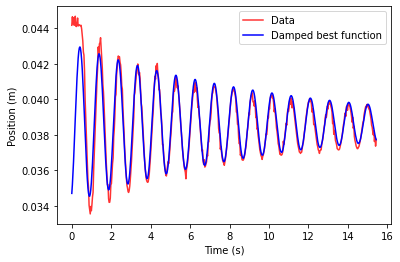

In [ ]:
res_lsq_water_3 = least_squares(get_residuals, guess_parameters_water_3, args=(position_data_array_clip2_water_3,time_data_array_clip2_water_3))
best_parameters_water_3 = res_lsq_water_3['x']
fitted_function_water_3 = cos_fit_fun_damped(best_parameters_water_3, time_data_array_clip2_water_3)
plt.plot(time_data_array_clip2_water_3, position_data_array_clip2_water_3, color='red',alpha = 0.8, label='Data')
plt.plot(time_data_array_clip2_water_3, fitted_function_water_3, color = 'blue', label = 'Damped best function' )
print('Best Amplitude: ' + str(best_parameters_water_3[0]))
print('Best Omega: ' + str(best_parameters_water_3[1]))
print('Best offset: ' + str(best_parameters_water_3[2]))
print('Best Phi: ' + str(best_parameters_water_3[3]))
print('Best Tau: ' + str(best_parameters_water_3[4]))
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')

# Oil: Experiment 1

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import least_squares
drive.mount("drive", force_remount=True)

Mounted at drive


In [ ]:
read_in_array_oil_1 = np.loadtxt('/content/drive/MyDrive/4AL/Final project files/Copy of oil1.txt', delimiter = ';', skiprows = 1)

In [ ]:
# Get the zeroeth column
time_data_array_oil_1 = read_in_array_oil_1[:, 0]

# convert from ms to s
time_data_array_oil_1 = time_data_array_oil_1/1000

In [ ]:
# Get the second column for position data
position_data_array_oil_1 = read_in_array_oil_1[:, 1]

# convert from mm to m
position_data_array_oil_1=position_data_array_oil_1/1000

Text(0, 0.5, 'Distance (m)')

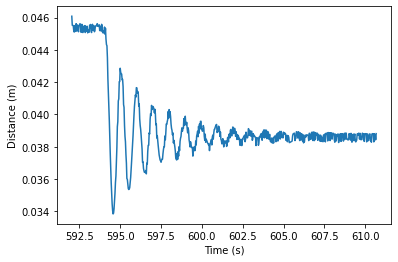

In [ ]:
plt.plot(time_data_array_oil_1, position_data_array_oil_1)
plt.xlabel('Time (s)')
plt.ylabel('Distance (m)')

Text(0.5, 0, 'Index')

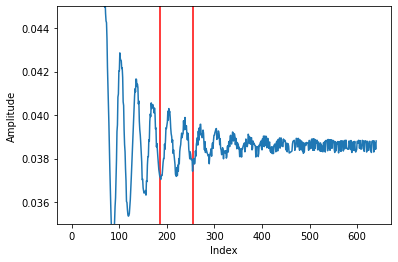

In [ ]:
plt.plot(position_data_array_oil_1)
plt.vlines(185, 0.035, 0.045, color = 'red')
plt.vlines(255, 0.035, 0.045, color = 'red')
plt.ylim([0.035, 0.045])
plt.ylabel('Amplitude')
plt.xlabel('Index')


In [ ]:
position_data_array_clip1_oil_1 = position_data_array_oil_1[185:255]
time_data_array_clip1_oil_1 = time_data_array_oil_1[185:255]
time_data_array_clip1_oil_1 = time_data_array_clip1_oil_1 - time_data_array_clip1_oil_1[0]

Text(0, 0.5, 'Amplitude')

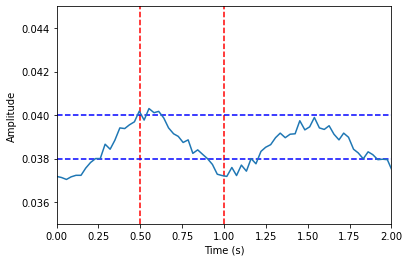

In [ ]:
plt.plot(time_data_array_clip1_oil_1, position_data_array_clip1_oil_1)
plt.vlines(0.50, .035, 0.045, color = 'red', linestyle = 'dashed')
plt.vlines(1, 0.035, 0.045, color = 'red', linestyle = 'dashed')

plt.hlines(0.038, 0, 2.6,  color = 'blue', linestyle = 'dashed')
plt.hlines(0.04, 0, 2.6,  color = 'blue', linestyle = 'dashed')

plt.xlim([0, 2.0])
plt.ylim([0.035, 0.045])

plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

In [ ]:
# Use the above graph to guess parameters

guess_amplitude_oil_1 = 0.002
guess_omega_oil_1 = 2 * np.pi / (1.5 - 0.5)
guess_offset_oil_1 = 0.038 #distance to centerline
guess_phi_oil_1 = 3

guess_parameters_oil_1 = [guess_amplitude_oil_1, guess_omega_oil_1, guess_offset_oil_1, guess_phi_oil_1]

In [ ]:
from scipy.optimize import least_squares

guess_amplitude = .2
guess_omega = 2 * np.pi / (2.5 - .8)
guess_offset = 1.2
guess_phi = 0.2

guess_parameters = [guess_amplitude, guess_omega, guess_offset, guess_phi]

In [ ]:
def cos_fit_fun_1(parameters, time):
  a = parameters[0]
  omega = parameters[1]
  offset = parameters[2]
  phi = parameters[3]
  y = a * np.cos(omega * time + phi) + offset
  return y

In [ ]:
def get_residuals(parameters, position_data, time_data):
  theoretical_function = cos_fit_fun_1(parameters, time_data)
  residuals = np.abs(theoretical_function - position_data)
  return residuals

Text(0, 0.5, 'Position (m)')

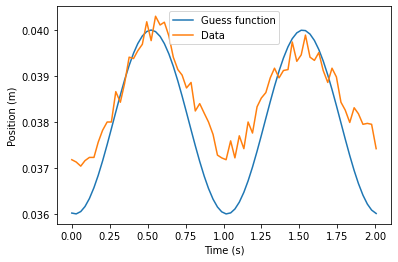

In [ ]:
theoretical_guess_function_oil_1 = cos_fit_fun_1(guess_parameters_oil_1, time_data_array_clip1_oil_1)
plt.plot(time_data_array_clip1_oil_1, theoretical_guess_function_oil_1, label='Guess function')
plt.plot(time_data_array_clip1_oil_1, position_data_array_clip1_oil_1, label = 'Data')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')

These functions will be used for fitting.

In [ ]:
def cos_fit_fun_1(parameters, time):
  a = parameters[0]
  omega = parameters[1]
  offset = parameters[2]
  phi = parameters[3]
  y = a * np.cos(omega * time + phi) + offset
  return y

In [ ]:
def get_residuals(parameters, position_data, time_data):
  theoretical_function = cos_fit_fun_1(parameters, time_data)
  residuals = np.abs(theoretical_function - position_data)
  return residuals

In [ ]:
res_lsq_oil_1 = least_squares(get_residuals, guess_parameters_oil_1, args=(position_data_array_clip1_oil_1,time_data_array_clip1_oil_1))

Best Amplitude: 0.0012135270679899434
Best Omega: 6.3915706287585135
Best offset: 0.03858247851055077
Best Phi: 2.7629171426511543


Text(0, 0.5, 'Position (m)')

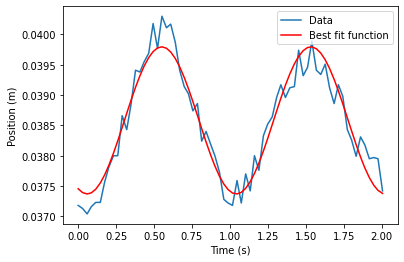

In [ ]:
best_parameters_oil_1 = res_lsq_oil_1['x']
fitted_function_oil_1 = cos_fit_fun_1(best_parameters_oil_1, time_data_array_clip1_oil_1)
plt.plot(time_data_array_clip1_oil_1, position_data_array_clip1_oil_1, label = 'Data')
plt.plot(time_data_array_clip1_oil_1, fitted_function_oil_1, color = 'red', label='Best fit function')
print('Best Amplitude: ' + str(best_parameters_oil_1[0]))
print('Best Omega: ' + str(best_parameters_oil_1[1]))
print('Best offset: ' + str(best_parameters_oil_1[2]))
print('Best Phi: ' + str(best_parameters_oil_1[3]))
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')

Now applying this to the entire curve

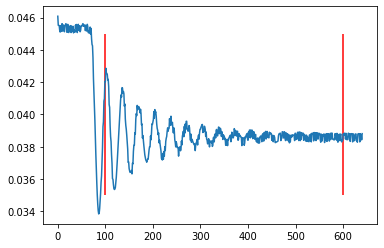

In [ ]:

plt.plot(position_data_array_oil_1)
plt.vlines(100, 0.035, 0.045, color = 'red')
plt.vlines(600, 0.035, 0.045, color = 'red')

In [ ]:
position_data_array_clip2_oil_1 = position_data_array_oil_1[150:]
time_data_array_clip2_oil_1 = time_data_array_oil_1[150:]
time_data_array_clip2_oil_1 = time_data_array_clip2_oil_1 - time_data_array_clip2_oil_1[0]

See how initial best fit cimpares to full range of data.

Text(0, 0.5, 'Position (m)')

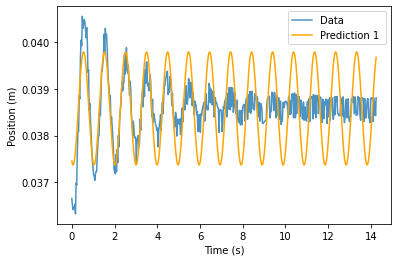

In [ ]:
guess_parameters_oil_1 = best_parameters_oil_1
theoretical_guess_function_oil_1 = cos_fit_fun_1(guess_parameters_oil_1, time_data_array_clip2_oil_1)
plt.plot(time_data_array_clip2_oil_1, position_data_array_clip2_oil_1, alpha = 0.8, label = 'Data')
plt.plot(time_data_array_clip2_oil_1, theoretical_guess_function_oil_1, color='orange', label = 'Prediction 1 ')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')

Next, fitted function with damping

Best Amplitude: 0.0012135270679899434
Best Omega: 6.3915706287585135
Best offset: 0.03858247851055077
Best Phi: 2.7629171426511543


Text(0, 0.5, 'Position (m)')

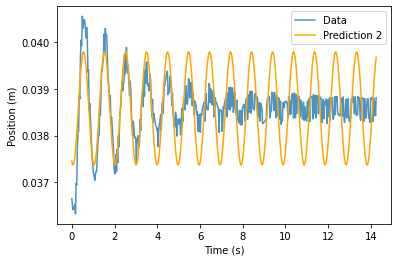

In [ ]:
best_parameters_oil_1 = res_lsq_oil_1['x']
fitted_function_oil_1 = cos_fit_fun_1(best_parameters_oil_1, time_data_array_clip2_oil_1)
plt.plot(time_data_array_clip2_oil_1, position_data_array_clip2_oil_1, alpha = 0.8, label='Data')
plt.plot(time_data_array_clip2_oil_1, fitted_function_oil_1, color = 'orange', label='Prediction 2')
print('Best Amplitude: ' + str(best_parameters_oil_1[0]))
print('Best Omega: ' + str(best_parameters_oil_1[1]))
print('Best offset: ' + str(best_parameters_oil_1[2]))
print('Best Phi: ' + str(best_parameters_oil_1[3]))
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')

Functions for residuals and damping.

In [ ]:
def cos_fit_fun_damped(parameters, time):
  a = parameters[0]
  omega = parameters[1]
  offset = parameters[2]
  phi = parameters[3]
  tau = parameters[4]
  y = a * np.cos(omega * time + phi) * np.exp(-time / tau) + offset
  return y

In [ ]:
def get_residuals(parameters, position_data, time_data):
  theoretical_function = cos_fit_fun_damped(parameters, time_data)
  residuals = np.abs(theoretical_function - position_data)
  return residuals

Text(0, 0.5, 'Height')

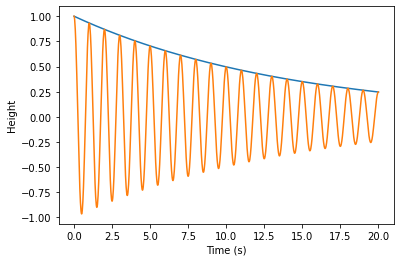

In [ ]:
time_axis_oil_1 = np.linspace(0, 20., 1000)
oscillation_oil_1 = np.cos(2. * np.pi * time_axis_oil_1)
exponential_oil_1 = np.exp(-time_axis_water_3 / 5.)
plt.plot(time_axis_oil_1, exponential_oil_1)
plt.xlabel('Time (s)')
plt.plot(time_axis_oil_1, exponential_oil_1 * oscillation_oil_1)
plt.ylabel('Height')

(-0.5, 7.0)

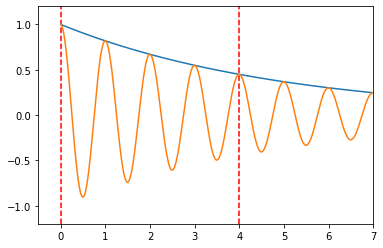

In [ ]:
time_axis_oil_1 = np.linspace(0, 7., 1000)
oscillation_oil_1 = np.cos(2. * np.pi * time_axis_oil_1)
exponential_oil_1 = np.exp(-time_axis_oil_1 / 5.)
plt.plot(time_axis_oil_1, exponential_oil_1)
plt.plot(time_axis_oil_1, exponential_oil_1 * oscillation_oil_1)
plt.vlines(0., -1.2, 1.2, color = 'red', linestyle = 'dashed')
plt.vlines(4., -1.2, 1.2, color = 'red', linestyle = 'dashed')
plt.ylim([-1.2, 1.2])
plt.xlim([-0.5, 7])

Best offset: 0.03858247851055077


Text(0, 0.5, 'Position (m)')

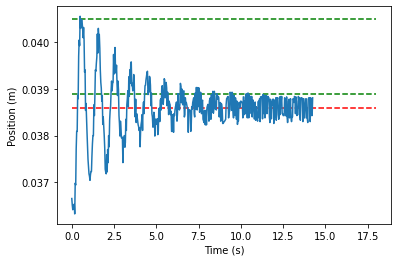

In [ ]:
best_parameters_oil_1 = res_lsq_oil_1['x']
plt.plot(time_data_array_clip2_oil_1, position_data_array_clip2_oil_1)

# To see the offset
plt.hlines(best_parameters_oil_1[2],-0, 18, color = 'red', linestyle = 'dashed')
print('Best offset: ' + str(best_parameters_oil_1[2]))

# To see the peak of the first cycle and the 11th cycle
plt.hlines([0.0405, 0.0389], 0, 18, color = 'green', linestyle = 'dashed')

plt.xlabel('Time (s)')
plt.ylabel('Position (m)')

In [ ]:
def find_tau(t, y_t, y_0):
  nom = t
  denom = np.log(y_0 / y_t)
  tau = nom / denom
  print('Tau is ' + str(tau))

In [ ]:
find_tau(12, .0004, 0.002)

Tau is 7.456019214715342


In [ ]:
guess_parameters_oil_1 = np.append(best_parameters_oil_1, 7.456)
print(guess_parameters_oil_1)

[1.21352707e-03 6.39157063e+00 3.85824785e-02 2.76291714e+00
 7.45600000e+00]


Text(0, 0.5, 'Position (m)')

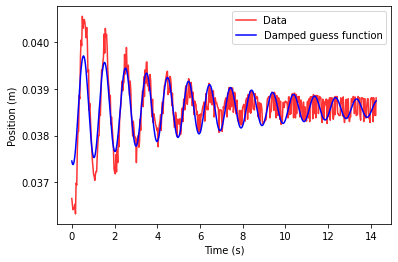

In [ ]:
theoretical_guess_function_oil_1 = cos_fit_fun_damped(guess_parameters_oil_1, time_data_array_clip2_oil_1)
plt.plot(time_data_array_clip2_oil_1, position_data_array_clip2_oil_1, color = 'red', alpha = 0.8, label = 'Data')
plt.plot(time_data_array_clip2_oil_1, theoretical_guess_function_oil_1, color = 'blue', label = 'Damped guess function')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')

In [ ]:
def get_residuals(parameters, position_data, time_data):
  theoretical_function = cos_fit_fun_damped(parameters, time_data)
  residuals = np.abs(theoretical_function - position_data)
  return residuals

Best Amplitude: 0.002332390520259923
Best Omega: 6.416624801800118
Best offset: 0.03862760055859948
Best Phi: 2.5065128563181496
Best Tau: 2.9754995317634534


Text(0, 0.5, 'Position (m)')

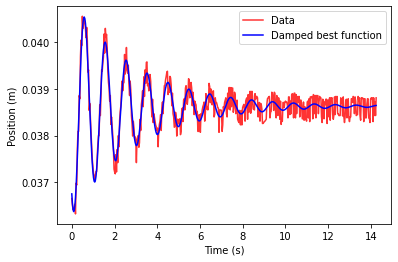

In [ ]:
res_lsq_oil_1 = least_squares(get_residuals, guess_parameters_oil_1, args=(position_data_array_clip2_oil_1,time_data_array_clip2_oil_1))
best_parameters_oil_1 = res_lsq_oil_1['x']
fitted_function_oil_1 = cos_fit_fun_damped(best_parameters_oil_1, time_data_array_clip2_oil_1)
plt.plot(time_data_array_clip2_oil_1, position_data_array_clip2_oil_1, color='red',alpha = 0.8, label='Data')
plt.plot(time_data_array_clip2_oil_1, fitted_function_oil_1, color = 'blue', label = 'Damped best function' )
print('Best Amplitude: ' + str(best_parameters_oil_1[0]))
print('Best Omega: ' + str(best_parameters_oil_1[1]))
print('Best offset: ' + str(best_parameters_oil_1[2]))
print('Best Phi: ' + str(best_parameters_oil_1[3]))
print('Best Tau: ' + str(best_parameters_oil_1[4]))
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')

# Oil: Experiment 2


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import least_squares
drive.mount("drive", force_remount=True)

Mounted at drive


In [ ]:
read_in_array_oil_2 = np.loadtxt('/content/drive/MyDrive/4AL/Final project files/Copy of oil2.txt', delimiter = ';', skiprows = 1)

In [ ]:
# Get the zeroeth column
time_data_array_oil_2 = read_in_array_oil_2[:, 0]

# convert from ms to s
time_data_array_oil_2 = time_data_array_oil_2/1000

In [ ]:
# Get the second column for position data
position_data_array_oil_2 = read_in_array_oil_2[:, 1]

# convert from mm to m
position_data_array_oil_2=position_data_array_oil_2/1000

Text(0, 0.5, 'Distance (m)')

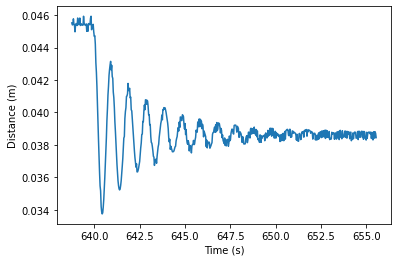

In [ ]:
plt.plot(time_data_array_oil_2, position_data_array_oil_2)
plt.xlabel('Time (s)')
plt.ylabel('Distance (m)')

Text(0.5, 0, 'Index')

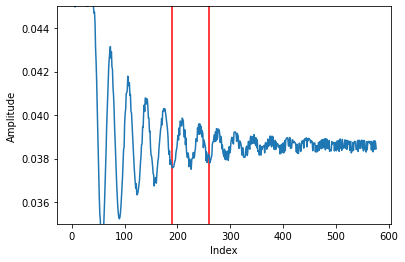

In [ ]:
plt.plot(position_data_array_oil_2)
plt.vlines(190, 0.035, 0.045, color = 'red')
plt.vlines(260, 0.035, 0.045, color = 'red')
plt.ylim([0.035, 0.045])
plt.ylabel('Amplitude')
plt.xlabel('Index')


In [ ]:
position_data_array_clip1_oil_2 = position_data_array_oil_2[185:255]
time_data_array_clip1_oil_2 = time_data_array_oil_2[185:255]
time_data_array_clip1_oil_2 = time_data_array_clip1_oil_2 - time_data_array_clip1_oil_2[0]

Text(0, 0.5, 'Amplitude')

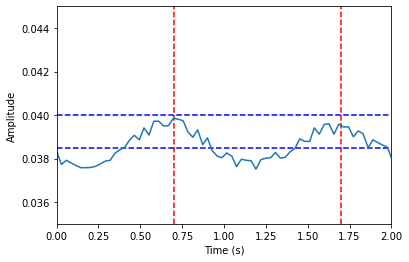

In [ ]:
plt.plot(time_data_array_clip1_oil_2, position_data_array_clip1_oil_2)
plt.vlines(0.70, .035, 0.045, color = 'red', linestyle = 'dashed')
plt.vlines(1.70, 0.035, 0.045, color = 'red', linestyle = 'dashed')

plt.hlines(0.0385, 0, 2.6,  color = 'blue', linestyle = 'dashed')
plt.hlines(0.04, 0, 2.6,  color = 'blue', linestyle = 'dashed')

plt.xlim([0, 2.0])
plt.ylim([0.035, 0.045])

plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

In [ ]:
# Use the above graph to guess parameters

guess_amplitude_oil_2 = 0.0015
guess_omega_oil_2 = 2 * np.pi / (1.7 - 0.7)
guess_offset_oil_2 = 0.0385 #distance to centerline
guess_phi_oil_2 = 2

guess_parameters_oil_2 = [guess_amplitude_oil_2, guess_omega_oil_2, guess_offset_oil_2, guess_phi_oil_2]

In [ ]:
def cos_fit_fun_1(parameters, time):
  a = parameters[0]
  omega = parameters[1]
  offset = parameters[2]
  phi = parameters[3]
  y = a * np.cos(omega * time + phi) + offset
  return y

In [ ]:
def get_residuals(parameters, position_data, time_data):
  theoretical_function = cos_fit_fun_1(parameters, time_data)
  residuals = np.abs(theoretical_function - position_data)
  return residuals

Text(0, 0.5, 'Position (m)')

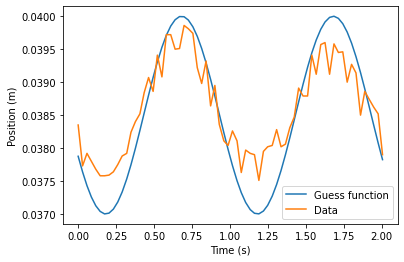

In [ ]:
theoretical_guess_function_oil_2 = cos_fit_fun_1(guess_parameters_oil_2, time_data_array_clip1_oil_2)
plt.plot(time_data_array_clip1_oil_2, theoretical_guess_function_oil_2, label='Guess function')
plt.plot(time_data_array_clip1_oil_2, position_data_array_clip1_oil_2, label = 'Data')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')

These functions will be used for fitting.

In [ ]:
def cos_fit_fun_1(parameters, time):
  a = parameters[0]
  omega = parameters[1]
  offset = parameters[2]
  phi = parameters[3]
  y = a * np.cos(omega * time + phi) + offset
  return y

In [ ]:
def get_residuals(parameters, position_data, time_data):
  theoretical_function = cos_fit_fun_1(parameters, time_data)
  residuals = np.abs(theoretical_function - position_data)
  return residuals

In [ ]:
res_lsq_oil_2 = least_squares(get_residuals, guess_parameters_oil_2, args=(position_data_array_clip1_oil_2,time_data_array_clip1_oil_2))

Best Amplitude: 0.0009346774742139605
Best Omega: 6.25937784778178
Best offset: 0.03860875138567983
Best Phi: 2.0985275122529443


Text(0, 0.5, 'Position (m)')

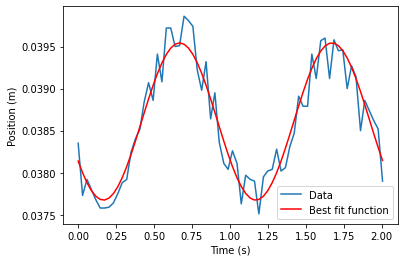

In [ ]:
best_parameters_oil_2 = res_lsq_oil_2['x']
fitted_function_oil_2 = cos_fit_fun_1(best_parameters_oil_2, time_data_array_clip1_oil_2)
plt.plot(time_data_array_clip1_oil_2, position_data_array_clip1_oil_2, label = 'Data')
plt.plot(time_data_array_clip1_oil_2, fitted_function_oil_2, color = 'red', label='Best fit function')
print('Best Amplitude: ' + str(best_parameters_oil_2[0]))
print('Best Omega: ' + str(best_parameters_oil_2[1]))
print('Best offset: ' + str(best_parameters_oil_2[2]))
print('Best Phi: ' + str(best_parameters_oil_2[3]))
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')

Now applying this to the entire curve

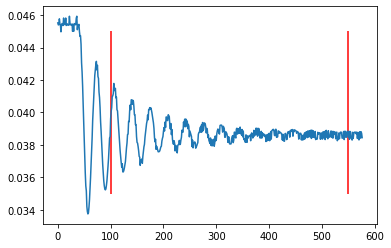

In [ ]:

plt.plot(position_data_array_oil_2)
plt.vlines(100, 0.035, 0.045, color = 'red')
plt.vlines(550, 0.035, 0.045, color = 'red')

In [ ]:
position_data_array_clip2_oil_2 = position_data_array_oil_2[150:]
time_data_array_clip2_oil_2 = time_data_array_oil_2[150:]
time_data_array_clip2_oil_2 = time_data_array_clip2_oil_2 - time_data_array_clip2_oil_2[0]

See how initial best fit cimpares to full range of data.

Text(0, 0.5, 'Position (m)')

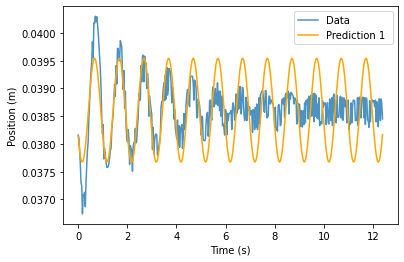

In [ ]:
guess_parameters_oil_2 = best_parameters_oil_2
theoretical_guess_function_oil_2 = cos_fit_fun_1(guess_parameters_oil_2, time_data_array_clip2_oil_2)
plt.plot(time_data_array_clip2_oil_2, position_data_array_clip2_oil_2, alpha = 0.8, label = 'Data')
plt.plot(time_data_array_clip2_oil_2, theoretical_guess_function_oil_2, color='orange', label = 'Prediction 1 ')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')

Next, fitted function with damping

Best Amplitude: 0.0009346774742139605
Best Omega: 6.25937784778178
Best offset: 0.03860875138567983
Best Phi: 2.0985275122529443


Text(0, 0.5, 'Position (m)')

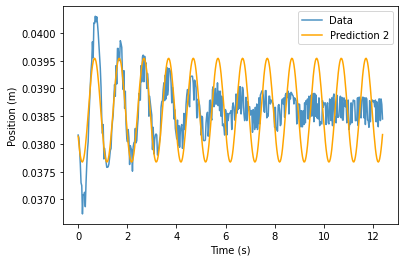

In [ ]:
best_parameters_oil_2 = res_lsq_oil_2['x']
fitted_function_oil_2 = cos_fit_fun_1(best_parameters_oil_2, time_data_array_clip2_oil_2)
plt.plot(time_data_array_clip2_oil_2, position_data_array_clip2_oil_2, alpha = 0.8, label='Data')
plt.plot(time_data_array_clip2_oil_2, fitted_function_oil_2, color = 'orange', label='Prediction 2')
print('Best Amplitude: ' + str(best_parameters_oil_2[0]))
print('Best Omega: ' + str(best_parameters_oil_2[1]))
print('Best offset: ' + str(best_parameters_oil_2[2]))
print('Best Phi: ' + str(best_parameters_oil_2[3]))
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')

Functions for residuals and damping.

In [ ]:
def cos_fit_fun_damped(parameters, time):
  a = parameters[0]
  omega = parameters[1]
  offset = parameters[2]
  phi = parameters[3]
  tau = parameters[4]
  y = a * np.cos(omega * time + phi) * np.exp(-time / tau) + offset
  return y

In [ ]:
def get_residuals(parameters, position_data, time_data):
  theoretical_function = cos_fit_fun_damped(parameters, time_data)
  residuals = np.abs(theoretical_function - position_data)
  return residuals

Text(0, 0.5, 'Height')

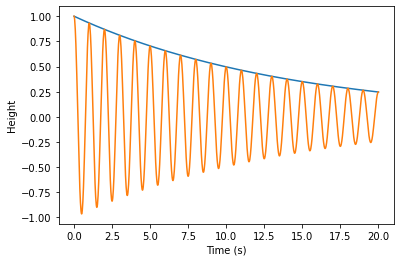

In [ ]:
time_axis_oil_2 = np.linspace(0, 20., 1000)
oscillation_oil_2 = np.cos(2. * np.pi * time_axis_oil_2)
exponential_oil_2 = np.exp(-time_axis_water_3 / 5.)
plt.plot(time_axis_oil_2, exponential_oil_2)
plt.xlabel('Time (s)')
plt.plot(time_axis_oil_2, exponential_oil_2 * oscillation_oil_2)
plt.ylabel('Height')

(-0.5, 7.0)

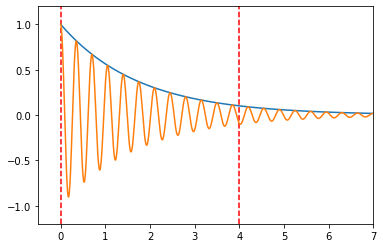

In [ ]:
time_axis_oil_2 = np.linspace(0, 7., 1000)
oscillation_oil_2 = np.cos(2. * np.pi * time_axis_oil_1)
exponential_oil_2 = np.exp(-time_axis_oil_1 / 5.)
plt.plot(time_axis_oil_2, exponential_oil_2)
plt.plot(time_axis_oil_2, exponential_oil_2* oscillation_oil_2)
plt.vlines(0., -1.2, 1.2, color = 'red', linestyle = 'dashed')
plt.vlines(4., -1.2, 1.2, color = 'red', linestyle = 'dashed')
plt.ylim([-1.2, 1.2])
plt.xlim([-0.5, 7])

Best offset: 0.03860875138567983


Text(0, 0.5, 'Position (m)')

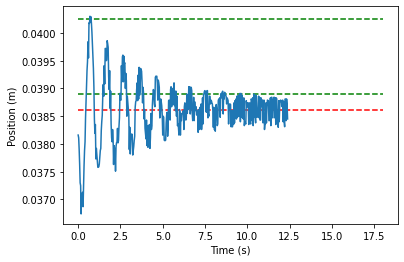

In [ ]:
best_parameters_oil_2 = res_lsq_oil_2['x']
plt.plot(time_data_array_clip2_oil_2, position_data_array_clip2_oil_2)

# To see the offset
plt.hlines(best_parameters_oil_2[2],-0, 18, color = 'red', linestyle = 'dashed')
print('Best offset: ' + str(best_parameters_oil_2[2]))

# To see the peak of the first cycle and the 11th cycle
plt.hlines([0.04025, 0.0389], 0, 18, color = 'green', linestyle = 'dashed')

plt.xlabel('Time (s)')
plt.ylabel('Position (m)')

In [ ]:
def find_tau(t, y_t, y_0):
  nom = t
  denom = np.log(y_0 / y_t)
  tau = nom / denom
  print('Tau is ' + str(tau))

In [ ]:
find_tau(12, .0003, 0.00175)

Tau is 6.8043080186933045


In [ ]:
guess_parameters_oil_2 = np.append(best_parameters_oil_2, 6.804)
print(guess_parameters_oil_2)

[9.34677474e-04 6.25937785e+00 3.86087514e-02 2.09852751e+00
 6.80400000e+00]


Text(0, 0.5, 'Position (m)')

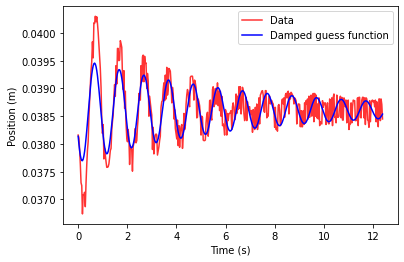

In [ ]:
theoretical_guess_function_oil_2 = cos_fit_fun_damped(guess_parameters_oil_2, time_data_array_clip2_oil_2)
plt.plot(time_data_array_clip2_oil_2, position_data_array_clip2_oil_2, color = 'red', alpha = 0.8, label = 'Data')
plt.plot(time_data_array_clip2_oil_2, theoretical_guess_function_oil_2, color = 'blue', label = 'Damped guess function')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')

In [ ]:
def get_residuals(parameters, position_data, time_data):
  theoretical_function = cos_fit_fun_damped(parameters, time_data)
  residuals = np.abs(theoretical_function - position_data)
  return residuals

Best Amplitude: 0.0018239789897854593
Best Omega: 6.388023258516487
Best offset: 0.03864227161078866
Best Phi: 1.73681037132907
Best Tau: 3.1175776796866743


Text(0, 0.5, 'Position (m)')

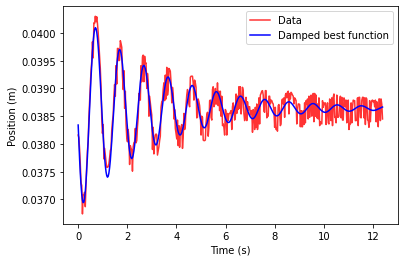

In [ ]:
res_lsq_oil_2 = least_squares(get_residuals, guess_parameters_oil_2, args=(position_data_array_clip2_oil_2,time_data_array_clip2_oil_2))
best_parameters_oil_2 = res_lsq_oil_2['x']
fitted_function_oil_2 = cos_fit_fun_damped(best_parameters_oil_2, time_data_array_clip2_oil_2)
plt.plot(time_data_array_clip2_oil_2, position_data_array_clip2_oil_2, color='red',alpha = 0.8, label='Data')
plt.plot(time_data_array_clip2_oil_2, fitted_function_oil_2, color = 'blue', label = 'Damped best function' )
print('Best Amplitude: ' + str(best_parameters_oil_2[0]))
print('Best Omega: ' + str(best_parameters_oil_2[1]))
print('Best offset: ' + str(best_parameters_oil_2[2]))
print('Best Phi: ' + str(best_parameters_oil_2[3]))
print('Best Tau: ' + str(best_parameters_oil_2[4]))
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')

# Oil: Experiment 3


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import least_squares
drive.mount("drive", force_remount=True)

Mounted at drive


In [ ]:
read_in_array_oil_3 = np.loadtxt('/content/drive/MyDrive/4AL/Final project files/Copy of oil3.txt', delimiter = ';', skiprows = 1)

In [ ]:
# Get the zeroeth column
time_data_array_oil_3 = read_in_array_oil_3[:, 0]

# convert from ms to s
time_data_array_oil_3 = time_data_array_oil_3/1000

In [ ]:
# Get the second column for position data
position_data_array_oil_3 = read_in_array_oil_3[:, 1]

# convert from mm to m
position_data_array_oil_3=position_data_array_oil_3/1000

Text(0, 0.5, 'Distance (m)')

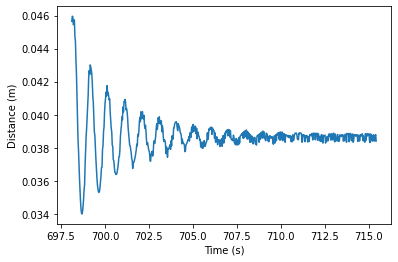

In [ ]:
plt.plot(time_data_array_oil_3, position_data_array_oil_3)
plt.xlabel('Time (s)')
plt.ylabel('Distance (m)')

Text(0.5, 0, 'Index')

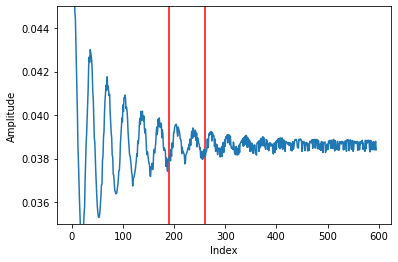

In [ ]:
plt.plot(position_data_array_oil_3)
plt.vlines(190, 0.035, 0.045, color = 'red')
plt.vlines(260, 0.035, 0.045, color = 'red')
plt.ylim([0.035, 0.045])
plt.ylabel('Amplitude')
plt.xlabel('Index')


In [ ]:
position_data_array_clip1_oil_3 = position_data_array_oil_3[185:255]
time_data_array_clip1_oil_3 = time_data_array_oil_3[185:255]
time_data_array_clip1_oil_3 = time_data_array_clip1_oil_3 - time_data_array_clip1_oil_3[0]

Text(0, 0.5, 'Amplitude')

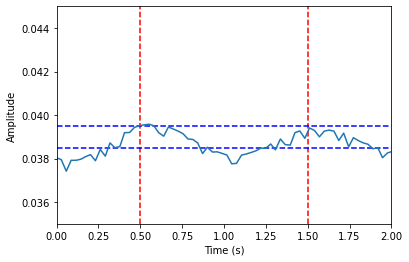

In [ ]:
plt.plot(time_data_array_clip1_oil_3, position_data_array_clip1_oil_3)
plt.vlines(0.50, .035, 0.045, color = 'red', linestyle = 'dashed')
plt.vlines(1.50, 0.035, 0.045, color = 'red', linestyle = 'dashed')

plt.hlines(0.0385, 0, 2.6,  color = 'blue', linestyle = 'dashed')
plt.hlines(0.0395, 0, 2.6,  color = 'blue', linestyle = 'dashed')

plt.xlim([0, 2.0])
plt.ylim([0.035, 0.045])

plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

In [ ]:
# Use the above graph to guess parameters

guess_amplitude_oil_3 = 0.0010
guess_omega_oil_3 = 2 * np.pi / (1.5 - 0.5)
guess_offset_oil_3 = 0.0385 #distance to centerline
guess_phi_oil_3 = 2.8

guess_parameters_oil_3 = [guess_amplitude_oil_3, guess_omega_oil_3, guess_offset_oil_3, guess_phi_oil_3]

In [ ]:
def cos_fit_fun_1(parameters, time):
  a = parameters[0]
  omega = parameters[1]
  offset = parameters[2]
  phi = parameters[3]
  y = a * np.cos(omega * time + phi) + offset
  return y

In [ ]:
def get_residuals(parameters, position_data, time_data):
  theoretical_function = cos_fit_fun_1(parameters, time_data)
  residuals = np.abs(theoretical_function - position_data)
  return residuals

Text(0, 0.5, 'Position (m)')

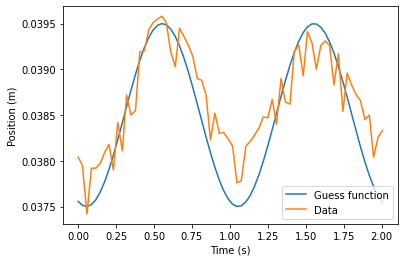

In [ ]:
theoretical_guess_function_oil_3 = cos_fit_fun_1(guess_parameters_oil_3, time_data_array_clip1_oil_3)
plt.plot(time_data_array_clip1_oil_3, theoretical_guess_function_oil_3, label='Guess function')
plt.plot(time_data_array_clip1_oil_3, position_data_array_clip1_oil_3, label = 'Data')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')

These functions will be used for fitting.

In [ ]:
def cos_fit_fun_1(parameters, time):
  a = parameters[0]
  omega = parameters[1]
  offset = parameters[2]
  phi = parameters[3]
  y = a * np.cos(omega * time + phi) + offset
  return y

In [ ]:
def get_residuals(parameters, position_data, time_data):
  theoretical_function = cos_fit_fun_1(parameters, time_data)
  residuals = np.abs(theoretical_function - position_data)
  return residuals

In [ ]:
res_lsq_oil_3 = least_squares(get_residuals, guess_parameters_oil_3, args=(position_data_array_clip1_oil_3,time_data_array_clip1_oil_3))

Best Amplitude: 0.0006826229245824355
Best Omega: 6.348256311850406
Best offset: 0.03867797433952788
Best Phi: 2.5537209419540448


Text(0, 0.5, 'Position (m)')

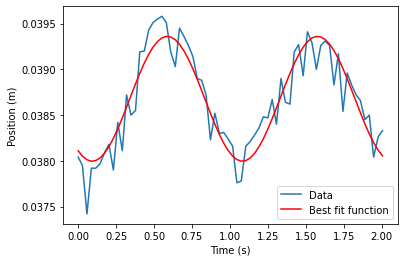

In [ ]:
best_parameters_oil_3 = res_lsq_oil_3['x']
fitted_function_oil_3 = cos_fit_fun_1(best_parameters_oil_3, time_data_array_clip1_oil_3)
plt.plot(time_data_array_clip1_oil_3, position_data_array_clip1_oil_3, label = 'Data')
plt.plot(time_data_array_clip1_oil_3, fitted_function_oil_3, color = 'red', label='Best fit function')
print('Best Amplitude: ' + str(best_parameters_oil_3[0]))
print('Best Omega: ' + str(best_parameters_oil_3[1]))
print('Best offset: ' + str(best_parameters_oil_3[2]))
print('Best Phi: ' + str(best_parameters_oil_3[3]))
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')

Now applying this to the entire curve

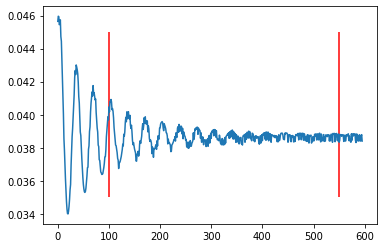

In [ ]:

plt.plot(position_data_array_oil_3)
plt.vlines(100, 0.035, 0.045, color = 'red')
plt.vlines(550, 0.035, 0.045, color = 'red')

In [ ]:
position_data_array_clip2_oil_3 = position_data_array_oil_3[150:]
time_data_array_clip2_oil_3 = time_data_array_oil_3[150:]
time_data_array_clip2_oil_3 = time_data_array_clip2_oil_3 - time_data_array_clip2_oil_3[0]

See how initial best fit cimpares to full range of data.

Text(0, 0.5, 'Position (m)')

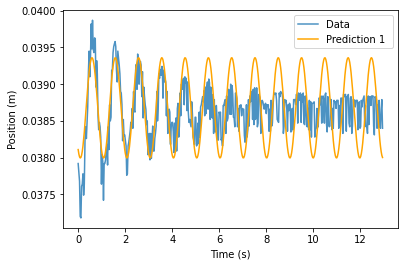

In [ ]:
guess_parameters_oil_3 = best_parameters_oil_3
theoretical_guess_function_oil_3 = cos_fit_fun_1(guess_parameters_oil_3, time_data_array_clip2_oil_3)
plt.plot(time_data_array_clip2_oil_3, position_data_array_clip2_oil_3, alpha = 0.8, label = 'Data')
plt.plot(time_data_array_clip2_oil_3, theoretical_guess_function_oil_3, color='orange', label = 'Prediction 1 ')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')

Next, fitted function with damping

Best Amplitude: 0.0006826229245824355
Best Omega: 6.348256311850406
Best offset: 0.03867797433952788
Best Phi: 2.5537209419540448


Text(0, 0.5, 'Position (m)')

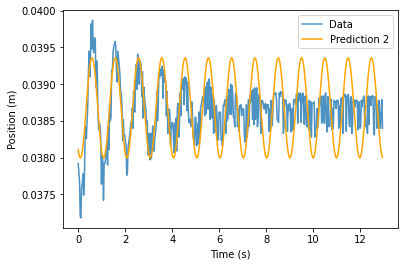

In [ ]:
best_parameters_oil_3 = res_lsq_oil_3['x']
fitted_function_oil_3 = cos_fit_fun_1(best_parameters_oil_3, time_data_array_clip2_oil_3)
plt.plot(time_data_array_clip2_oil_3, position_data_array_clip2_oil_3, alpha = 0.8, label='Data')
plt.plot(time_data_array_clip2_oil_3, fitted_function_oil_3, color = 'orange', label='Prediction 2')
print('Best Amplitude: ' + str(best_parameters_oil_3[0]))
print('Best Omega: ' + str(best_parameters_oil_3[1]))
print('Best offset: ' + str(best_parameters_oil_3[2]))
print('Best Phi: ' + str(best_parameters_oil_3[3]))
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')

Functions for residuals and damping.

In [ ]:
def cos_fit_fun_damped(parameters, time):
  a = parameters[0]
  omega = parameters[1]
  offset = parameters[2]
  phi = parameters[3]
  tau = parameters[4]
  y = a * np.cos(omega * time + phi) * np.exp(-time / tau) + offset
  return y

In [ ]:
def get_residuals(parameters, position_data, time_data):
  theoretical_function = cos_fit_fun_damped(parameters, time_data)
  residuals = np.abs(theoretical_function - position_data)
  return residuals

Text(0, 0.5, 'Height')

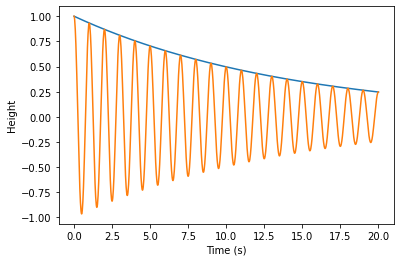

In [ ]:
time_axis_oil_3 = np.linspace(0, 20., 1000)
oscillation_oil_3 = np.cos(2. * np.pi * time_axis_oil_3)
exponential_oil_3= np.exp(-time_axis_water_3 / 5.)
plt.plot(time_axis_oil_3, exponential_oil_3)
plt.xlabel('Time (s)')
plt.plot(time_axis_oil_3, exponential_oil_3 * oscillation_oil_3)
plt.ylabel('Height')

(-0.5, 7.0)

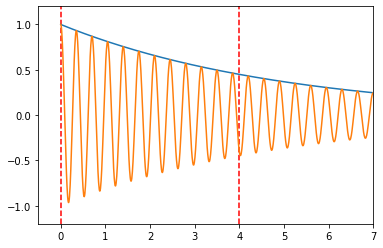

In [ ]:
time_axis_oil_3 = np.linspace(0, 7., 1000)
oscillation_oil_3 = np.cos(2. * np.pi * time_axis_oil_1)
exponential_oil_3 = np.exp(-time_axis_oil_3 / 5.)
plt.plot(time_axis_oil_3, exponential_oil_3)
plt.plot(time_axis_oil_3, exponential_oil_3* oscillation_oil_3)
plt.vlines(0., -1.2, 1.2, color = 'red', linestyle = 'dashed')
plt.vlines(4., -1.2, 1.2, color = 'red', linestyle = 'dashed')
plt.ylim([-1.2, 1.2])
plt.xlim([-0.5, 7])

Best offset: 0.03867797433952788


Text(0, 0.5, 'Position (m)')

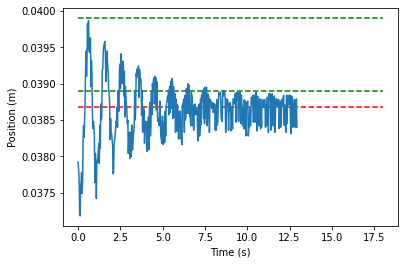

In [ ]:
best_parameters_oil_3 = res_lsq_oil_3['x']
plt.plot(time_data_array_clip2_oil_3, position_data_array_clip2_oil_3)

# To see the offset
plt.hlines(best_parameters_oil_3[2],-0, 18, color = 'red', linestyle = 'dashed')
print('Best offset: ' + str(best_parameters_oil_3[2]))

# To see the peak of the first cycle and the 11th cycle
plt.hlines([0.0399, 0.0389], 0, 18, color = 'green', linestyle = 'dashed')

plt.xlabel('Time (s)')
plt.ylabel('Position (m)')

In [ ]:
def find_tau(t, y_t, y_0):
  nom = t
  denom = np.log(y_0 / y_t)
  tau = nom / denom
  print('Tau is ' + str(tau))

In [ ]:
find_tau(12, .0003, 0.001)

Tau is 9.967002540990448


In [ ]:
guess_parameters_oil_3 = np.append(best_parameters_oil_3, 9.96)
print(guess_parameters_oil_3)

[6.82622925e-04 6.34825631e+00 3.86779743e-02 2.55372094e+00
 9.96000000e+00]


Text(0, 0.5, 'Position (m)')

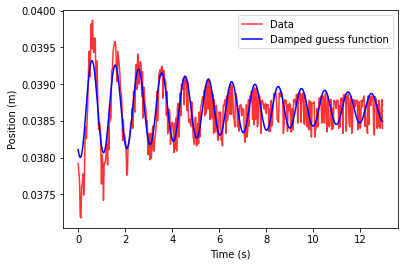

In [ ]:
theoretical_guess_function_oil_3 = cos_fit_fun_damped(guess_parameters_oil_3, time_data_array_clip2_oil_3)
plt.plot(time_data_array_clip2_oil_3, position_data_array_clip2_oil_3, color = 'red', alpha = 0.8, label = 'Data')
plt.plot(time_data_array_clip2_oil_3, theoretical_guess_function_oil_3, color = 'blue', label = 'Damped guess function')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')

In [ ]:
def get_residuals(parameters, position_data, time_data):
  theoretical_function = cos_fit_fun_damped(parameters, time_data)
  residuals = np.abs(theoretical_function - position_data)
  return residuals

Best Amplitude: 0.0012482485933454925
Best Omega: 6.412675370831762
Best offset: 0.03865023324472344
Best Phi: 2.2737426072108384
Best Tau: 3.2466912917059583


Text(0, 0.5, 'Position (m)')

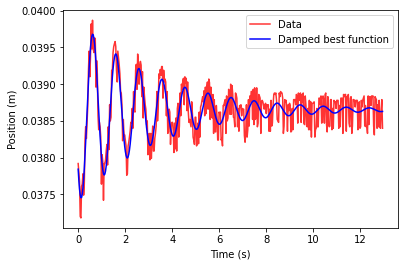

In [ ]:
res_lsq_oil_3 = least_squares(get_residuals, guess_parameters_oil_3, args=(position_data_array_clip2_oil_3,time_data_array_clip2_oil_3))
best_parameters_oil_3 = res_lsq_oil_3['x']
fitted_function_oil_3 = cos_fit_fun_damped(best_parameters_oil_3, time_data_array_clip2_oil_3)
plt.plot(time_data_array_clip2_oil_3, position_data_array_clip2_oil_3, color='red',alpha = 0.8, label='Data')
plt.plot(time_data_array_clip2_oil_3, fitted_function_oil_3, color = 'blue', label = 'Damped best function' )
print('Best Amplitude: ' + str(best_parameters_oil_3[0]))
print('Best Omega: ' + str(best_parameters_oil_3[1]))
print('Best offset: ' + str(best_parameters_oil_3[2]))
print('Best Phi: ' + str(best_parameters_oil_3[3]))
print('Best Tau: ' + str(best_parameters_oil_3[4]))
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')

# Gel (Hand Sanitizer): Experiment 1




In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import least_squares
drive.mount("drive", force_remount=True)

Mounted at drive


In [ ]:
read_in_array_san_1 = np.loadtxt('/content/drive/MyDrive/4AL/Final project files/Copy of san1.txt', delimiter = ';', skiprows = 1)

In [ ]:
# Get the zeroeth column
time_data_array_san_1 = read_in_array_san_1[:, 0]

# convert from ms to s
time_data_array_san_1 = time_data_array_san_1/1000

In [ ]:
# Get the second column for position data
position_data_array_san_1 = read_in_array_san_1[:, 1]

# convert from mm to m
position_data_array_san_1=position_data_array_san_1/1000

Text(0, 0.5, 'Distance (m)')

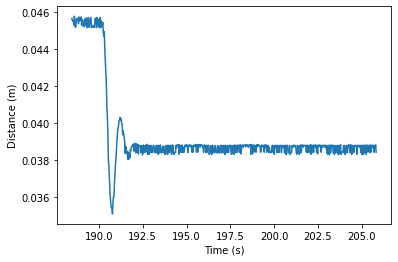

In [ ]:
plt.plot(time_data_array_san_1, position_data_array_san_1)
plt.xlabel('Time (s)')
plt.ylabel('Distance (m)')

Text(0.5, 0, 'Index')

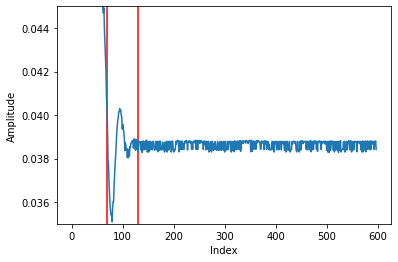

In [ ]:
plt.plot(position_data_array_san_1)
plt.vlines(70, 0.035, 0.045, color = 'red')
plt.vlines(130, 0.035, 0.045, color = 'red')
plt.ylim([0.035, 0.045])
plt.ylabel('Amplitude')
plt.xlabel('Index')


In [ ]:
position_data_array_clip1_san_1 = position_data_array_san_1[70:130]
time_data_array_clip1_san_1 = time_data_array_san_1[70:130]
time_data_array_clip1_san_1 = time_data_array_clip1_san_1 - time_data_array_clip1_san_1[0]

Text(0, 0.5, 'Amplitude')

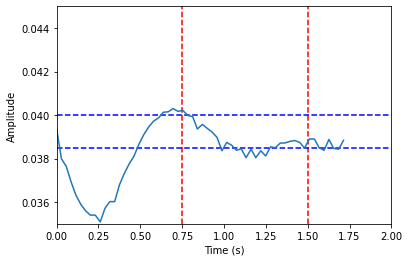

In [ ]:
plt.plot(time_data_array_clip1_san_1, position_data_array_clip1_san_1)
plt.vlines(0.75, .035, 0.045, color = 'red', linestyle = 'dashed')
plt.vlines(1.50, 0.035, 0.045, color = 'red', linestyle = 'dashed')

plt.hlines(0.04, 0, 2.6,  color = 'blue', linestyle = 'dashed')
plt.hlines(0.0385, 0, 2.6,  color = 'blue', linestyle = 'dashed')

plt.xlim([0, 2.0])
plt.ylim([0.035, 0.045])

plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

In [ ]:
# Use the above graph to guess parameters

guess_amplitude_san_1 = 0.0015
guess_omega_san_1 = 2 * np.pi / (1.5 - 0.75)
guess_offset_san_1 = 0.0385 #distance to centerline
guess_phi_san_1 = 6.4
guess_parameters_san_1 = [guess_amplitude_san_1, guess_omega_san_1, guess_offset_san_1, guess_phi_san_1]

In [ ]:
def cos_fit_fun_1(parameters, time):
  a = parameters[0]
  omega = parameters[1]
  offset = parameters[2]
  phi = parameters[3]
  y = a * np.cos(omega * time + phi) + offset
  return y

In [ ]:
def get_residuals(parameters, position_data, time_data):
  theoretical_function = cos_fit_fun_1(parameters, time_data)
  residuals = np.abs(theoretical_function - position_data)
  return residuals

Text(0, 0.5, 'Position (m)')

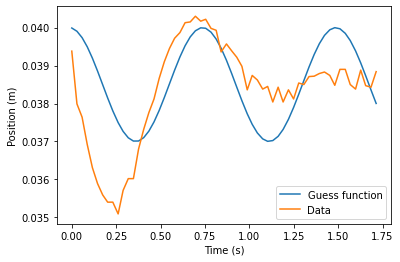

In [ ]:
theoretical_guess_function_san_1 = cos_fit_fun_1(guess_parameters_san_1, time_data_array_clip1_san_1)
plt.plot(time_data_array_clip1_san_1, theoretical_guess_function_san_1, label='Guess function')
plt.plot(time_data_array_clip1_san_1, position_data_array_clip1_san_1, label = 'Data')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')

These functions will be used for fitting.

In [ ]:
def cos_fit_fun_1(parameters, time):
  a = parameters[0]
  omega = parameters[1]
  offset = parameters[2]
  phi = parameters[3]
  y = a * np.cos(omega * time + phi) + offset
  return y

In [ ]:
def get_residuals(parameters, position_data, time_data):
  theoretical_function = cos_fit_fun_1(parameters, time_data)
  residuals = np.abs(theoretical_function - position_data)
  return residuals

In [ ]:
res_lsq_san_1 = least_squares(get_residuals, guess_parameters_san_1, args=(position_data_array_clip1_san_1,time_data_array_clip1_san_1))

Best Amplitude: 0.00145077345215863
Best Omega: 5.986581069009426
Best offset: 0.03853037149729662
Best Phi: 8.044866011062568


Text(0, 0.5, 'Position (m)')

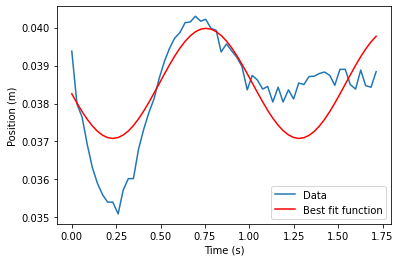

In [ ]:
best_parameters_san_1 = res_lsq_san_1['x']
fitted_function_san_1 = cos_fit_fun_1(best_parameters_san_1, time_data_array_clip1_san_1)
plt.plot(time_data_array_clip1_san_1, position_data_array_clip1_san_1, label = 'Data')
plt.plot(time_data_array_clip1_san_1, fitted_function_san_1, color = 'red', label='Best fit function')
print('Best Amplitude: ' + str(best_parameters_san_1[0]))
print('Best Omega: ' + str(best_parameters_san_1[1]))
print('Best offset: ' + str(best_parameters_san_1[2]))
print('Best Phi: ' + str(best_parameters_san_1[3]))
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')

Now applying this to the entire curve

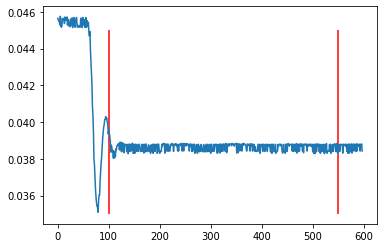

In [ ]:

plt.plot(position_data_array_san_1)
plt.vlines(100, 0.035, 0.045, color = 'red')
plt.vlines(550, 0.035, 0.045, color = 'red')

In [ ]:
position_data_array_clip2_san_1 = position_data_array_san_1[100:]
time_data_array_clip2_san_1 = time_data_array_san_1[100:]
time_data_array_clip2_san_1 = time_data_array_clip2_san_1 - time_data_array_clip2_san_1[0]

See how initial best fit cimpares to full range of data.

Text(0, 0.5, 'Position (m)')

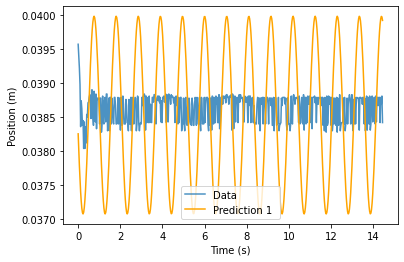

In [ ]:
guess_parameters_san_1 = best_parameters_san_1
theoretical_guess_function_san_1 = cos_fit_fun_1(guess_parameters_san_1, time_data_array_clip2_san_1)
plt.plot(time_data_array_clip2_san_1, position_data_array_clip2_san_1, alpha = 0.8, label = 'Data')
plt.plot(time_data_array_clip2_san_1, theoretical_guess_function_san_1, color='orange', label = 'Prediction 1 ')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')

Next, fitted function with damping

Best Amplitude: 0.00145077345215863
Best Omega: 5.986581069009426
Best offset: 0.03853037149729662
Best Phi: 8.044866011062568


Text(0, 0.5, 'Position (m)')

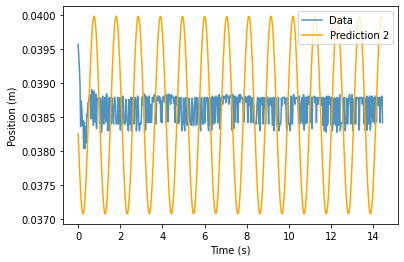

In [ ]:
best_parameters_san_1 = res_lsq_san_1['x']
fitted_function_san_1 = cos_fit_fun_1(best_parameters_san_1, time_data_array_clip2_san_1)
plt.plot(time_data_array_clip2_san_1, position_data_array_clip2_san_1, alpha = 0.8, label='Data')
plt.plot(time_data_array_clip2_san_1, fitted_function_san_1, color = 'orange', label='Prediction 2')
print('Best Amplitude: ' + str(best_parameters_san_1[0]))
print('Best Omega: ' + str(best_parameters_san_1[1]))
print('Best offset: ' + str(best_parameters_san_1[2]))
print('Best Phi: ' + str(best_parameters_san_1[3]))
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')

Functions for residuals and damping.

In [ ]:
def cos_fit_fun_damped(parameters, time):
  a = parameters[0]
  omega = parameters[1]
  offset = parameters[2]
  phi = parameters[3]
  tau = parameters[4]
  y = a * np.cos(omega * time + phi) * np.exp(-time / tau) + offset
  return y

In [ ]:
def get_residuals(parameters, position_data, time_data):
  theoretical_function = cos_fit_fun_damped(parameters, time_data)
  residuals = np.abs(theoretical_function - position_data)
  return residuals

Text(0, 0.5, 'Height')

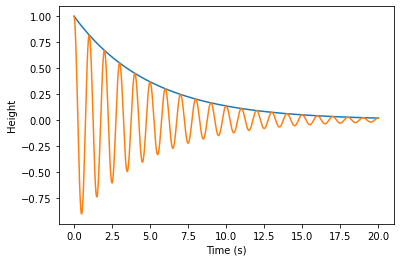

In [ ]:
time_axis_san_1 = np.linspace(0, 20., 1000)
oscillation_san_1 = np.cos(2. * np.pi * time_axis_san_1)
exponential_san_1= np.exp(-time_axis_san_1 / 5.)
plt.plot(time_axis_san_1, exponential_san_1)
plt.xlabel('Time (s)')
plt.plot(time_axis_san_1, exponential_san_1 * oscillation_san_1)
plt.ylabel('Height')

(-0.5, 7.0)

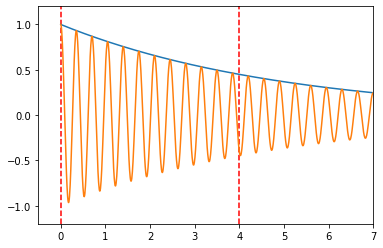

In [ ]:
time_axis_san_1 = np.linspace(0, 7., 1000)
oscillation_san_1 = np.cos(2. * np.pi * time_axis_oil_1)
exponential_san_1 = np.exp(-time_axis_san_1 / 5.)
plt.plot(time_axis_san_1, exponential_san_1)
plt.plot(time_axis_san_1, exponential_san_1* oscillation_san_1)
plt.vlines(0., -1.2, 1.2, color = 'red', linestyle = 'dashed')
plt.vlines(4., -1.2, 1.2, color = 'red', linestyle = 'dashed')
plt.ylim([-1.2, 1.2])
plt.xlim([-0.5, 7])

Best offset: 0.03853037149729662


Text(0, 0.5, 'Position (m)')

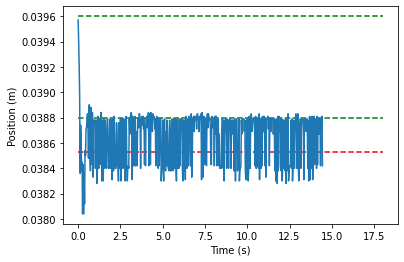

In [ ]:
best_parameters_san_1 = res_lsq_san_1['x']
plt.plot(time_data_array_clip2_san_1, position_data_array_clip2_san_1)

# To see the offset
plt.hlines(best_parameters_san_1[2],-0, 18, color = 'red', linestyle = 'dashed')
print('Best offset: ' + str(best_parameters_san_1[2]))

# To see the peak of the first cycle and the 11th cycle
plt.hlines([0.0396, 0.0388], 0, 18, color = 'green', linestyle = 'dashed')

plt.xlabel('Time (s)')
plt.ylabel('Position (m)')

In [ ]:
def find_tau(t, y_t, y_0):
  nom = t
  denom = np.log(y_0 / y_t)
  tau = nom / denom
  print('Tau is ' + str(tau))

In [ ]:
find_tau(12, .0003, 0.0011)

Tau is 9.235863277338916


In [ ]:
guess_parameters_san_1 = np.append(best_parameters_san_1, 9.23)
print(guess_parameters_san_1)

[1.45077345e-03 5.98658107e+00 3.85303715e-02 8.04486601e+00
 9.23000000e+00]


Text(0, 0.5, 'Position (m)')

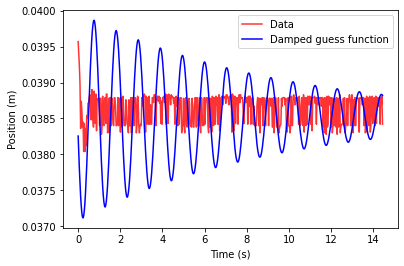

In [ ]:
theoretical_guess_function_san_1 = cos_fit_fun_damped(guess_parameters_san_1, time_data_array_clip2_san_1)
plt.plot(time_data_array_clip2_san_1, position_data_array_clip2_san_1, color = 'red', alpha = 0.8, label = 'Data')
plt.plot(time_data_array_clip2_san_1, theoretical_guess_function_san_1, color = 'blue', label = 'Damped guess function')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')

In [ ]:
def get_residuals(parameters, position_data, time_data):
  theoretical_function = cos_fit_fun_damped(parameters, time_data)
  residuals = np.abs(theoretical_function - position_data)
  return residuals

Best Amplitude: 0.0010012964877685352
Best Omega: 9.242350391746637
Best offset: 0.03862731013180098
Best Phi: 6.588502394831037
Best Tau: 0.28860835737330104


Text(0, 0.5, 'Position (m)')

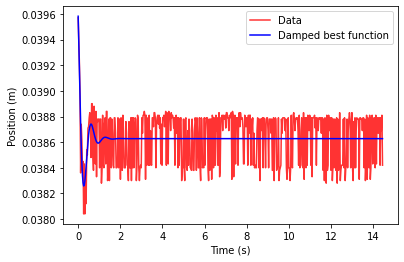

In [ ]:
res_lsq_san_1 = least_squares(get_residuals, guess_parameters_san_1, args=(position_data_array_clip2_san_1,time_data_array_clip2_san_1))
best_parameters_san_1 = res_lsq_san_1['x']
fitted_function_san_1 = cos_fit_fun_damped(best_parameters_san_1, time_data_array_clip2_san_1)
plt.plot(time_data_array_clip2_san_1, position_data_array_clip2_san_1, color='red',alpha = 0.8, label='Data')
plt.plot(time_data_array_clip2_san_1, fitted_function_san_1, color = 'blue', label = 'Damped best function' )
print('Best Amplitude: ' + str(best_parameters_san_1[0]))
print('Best Omega: ' + str(best_parameters_san_1[1]))
print('Best offset: ' + str(best_parameters_san_1[2]))
print('Best Phi: ' + str(best_parameters_san_1[3]))
print('Best Tau: ' + str(best_parameters_san_1[4]))
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')

# Gel (Hand Sanitizer): Experiment 2




In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import least_squares
drive.mount("drive", force_remount=True)

Mounted at drive


In [ ]:
read_in_array_san_2 = np.loadtxt('/content/drive/MyDrive/4AL/Final project files/Copy of san2.txt', delimiter = ';', skiprows = 1)

In [ ]:
# Get the zeroeth column
time_data_array_san_2 = read_in_array_san_2[:, 0]

# convert from ms to s
time_data_array_san_2 = time_data_array_san_2/1000

In [ ]:
# Get the second column for position data
position_data_array_san_2 = read_in_array_san_2[:, 1]

# convert from mm to m
position_data_array_san_2=position_data_array_san_2/1000

Text(0, 0.5, 'Distance (m)')

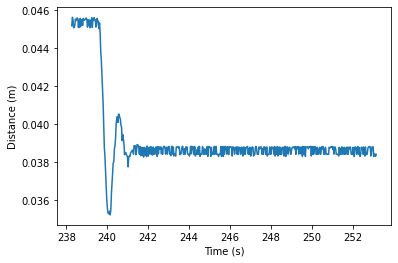

In [ ]:
plt.plot(time_data_array_san_2, position_data_array_san_2)
plt.xlabel('Time (s)')
plt.ylabel('Distance (m)')

Text(0.5, 0, 'Index')

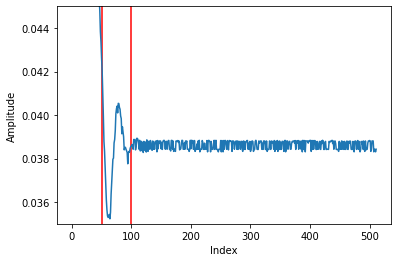

In [ ]:
plt.plot(position_data_array_san_2)
plt.vlines(50, 0.035, 0.045, color = 'red')
plt.vlines(100, 0.035, 0.045, color = 'red')
plt.ylim([0.035, 0.045])
plt.ylabel('Amplitude')
plt.xlabel('Index')


In [ ]:
position_data_array_clip1_san_2 = position_data_array_san_2[50:100]
time_data_array_clip1_san_2 = time_data_array_san_2[50:100]
time_data_array_clip1_san_2 = time_data_array_clip1_san_2 - time_data_array_clip1_san_2[0]

Text(0, 0.5, 'Amplitude')

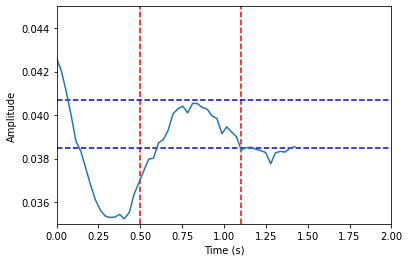

In [ ]:
plt.plot(time_data_array_clip1_san_2, position_data_array_clip1_san_2)
plt.vlines(0.5, .035, 0.045, color = 'red', linestyle = 'dashed')
plt.vlines(1.10, 0.035, 0.045, color = 'red', linestyle = 'dashed')

plt.hlines(0.0407, 0, 2.6,  color = 'blue', linestyle = 'dashed')
plt.hlines(0.0385, 0, 2.6,  color = 'blue', linestyle = 'dashed')

plt.xlim([0, 2.0])
plt.ylim([0.035, 0.045])

plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

In [ ]:
# Use the above graph to guess parameters

guess_amplitude_san_2 = 0.0022
guess_omega_san_2 = 2 * np.pi / (1)
guess_offset_san_2 = 0.0385 #distance to centerline
guess_phi_san_2 = 1
guess_parameters_san_2 = [guess_amplitude_san_2, guess_omega_san_2, guess_offset_san_2, guess_phi_san_2]

In [ ]:
def cos_fit_fun_1(parameters, time):
  a = parameters[0]
  omega = parameters[1]
  offset = parameters[2]
  phi = parameters[3]
  y = a * np.cos(omega * time + phi) + offset
  return y

In [ ]:
def get_residuals(parameters, position_data, time_data):
  theoretical_function = cos_fit_fun_1(parameters, time_data)
  residuals = np.abs(theoretical_function - position_data)
  return residuals

Text(0, 0.5, 'Position (m)')

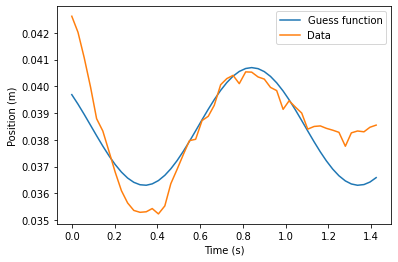

In [ ]:
theoretical_guess_function_san_2 = cos_fit_fun_1(guess_parameters_san_2, time_data_array_clip1_san_2)
plt.plot(time_data_array_clip1_san_2, theoretical_guess_function_san_2, label='Guess function')
plt.plot(time_data_array_clip1_san_2, position_data_array_clip1_san_2, label = 'Data')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')

These functions will be used for fitting.

In [ ]:
def cos_fit_fun_1(parameters, time):
  a = parameters[0]
  omega = parameters[1]
  offset = parameters[2]
  phi = parameters[3]
  y = a * np.cos(omega * time + phi) + offset
  return y

In [ ]:
def get_residuals(parameters, position_data, time_data):
  theoretical_function = cos_fit_fun_1(parameters, time_data)
  residuals = np.abs(theoretical_function - position_data)
  return residuals

In [ ]:
res_lsq_san_2 = least_squares(get_residuals, guess_parameters_san_2, args=(position_data_array_clip1_san_2,time_data_array_clip1_san_2))

Best Amplitude: 0.0021120672271659185
Best Omega: 6.880519567472969
Best offset: 0.03875784985822428
Best Phi: 0.5618221459792243


Text(0, 0.5, 'Position (m)')

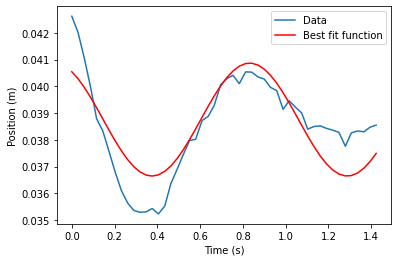

In [ ]:
best_parameters_san_2 = res_lsq_san_2['x']
fitted_function_san_2 = cos_fit_fun_1(best_parameters_san_2, time_data_array_clip1_san_2)
plt.plot(time_data_array_clip1_san_2, position_data_array_clip1_san_2, label = 'Data')
plt.plot(time_data_array_clip1_san_2, fitted_function_san_2, color = 'red', label='Best fit function')
print('Best Amplitude: ' + str(best_parameters_san_2[0]))
print('Best Omega: ' + str(best_parameters_san_2[1]))
print('Best offset: ' + str(best_parameters_san_2[2]))
print('Best Phi: ' + str(best_parameters_san_2[3]))
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')

Now applying this to the entire curve

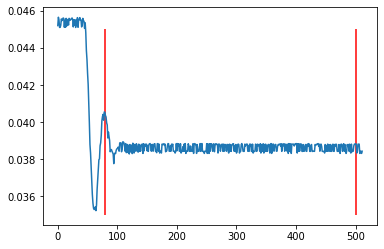

In [ ]:

plt.plot(position_data_array_san_2)
plt.vlines(80, 0.035, 0.045, color = 'red')
plt.vlines(500, 0.035, 0.045, color = 'red')

In [ ]:
position_data_array_clip2_san_2 = position_data_array_san_2[50:]
time_data_array_clip2_san_2 = time_data_array_san_2[50:]
time_data_array_clip2_san_2 = time_data_array_clip2_san_2 - time_data_array_clip2_san_2[0]

See how initial best fit cimpares to full range of data.

Text(0, 0.5, 'Position (m)')

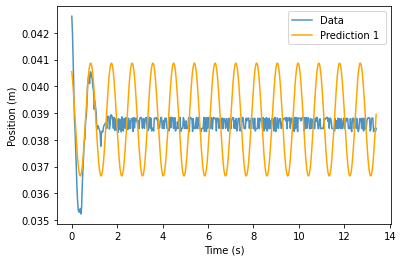

In [ ]:
guess_parameters_san_2 = best_parameters_san_2
theoretical_guess_function_san_2 = cos_fit_fun_1(guess_parameters_san_2, time_data_array_clip2_san_2)
plt.plot(time_data_array_clip2_san_2, position_data_array_clip2_san_2, alpha = 0.8, label = 'Data')
plt.plot(time_data_array_clip2_san_2, theoretical_guess_function_san_2, color='orange', label = 'Prediction 1 ')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')

Next, fitted function with damping

Best Amplitude: 0.0021120672271659185
Best Omega: 6.880519567472969
Best offset: 0.03875784985822428
Best Phi: 0.5618221459792243


Text(0, 0.5, 'Position (m)')

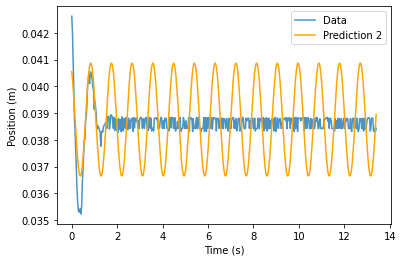

In [ ]:
best_parameters_san_2 = res_lsq_san_2['x']
fitted_function_san_2 = cos_fit_fun_1(best_parameters_san_2, time_data_array_clip2_san_2)
plt.plot(time_data_array_clip2_san_2, position_data_array_clip2_san_2, alpha = 0.8, label='Data')
plt.plot(time_data_array_clip2_san_2, fitted_function_san_2, color = 'orange', label='Prediction 2')
print('Best Amplitude: ' + str(best_parameters_san_2[0]))
print('Best Omega: ' + str(best_parameters_san_2[1]))
print('Best offset: ' + str(best_parameters_san_2[2]))
print('Best Phi: ' + str(best_parameters_san_2[3]))
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')

Functions for residuals and damping.

In [ ]:
def cos_fit_fun_damped(parameters, time):
  a = parameters[0]
  omega = parameters[1]
  offset = parameters[2]
  phi = parameters[3]
  tau = parameters[4]
  y = a * np.cos(omega * time + phi) * np.exp(-time / tau) + offset
  return y

In [ ]:
def get_residuals(parameters, position_data, time_data):
  theoretical_function = cos_fit_fun_damped(parameters, time_data)
  residuals = np.abs(theoretical_function - position_data)
  return residuals

Text(0, 0.5, 'Height')

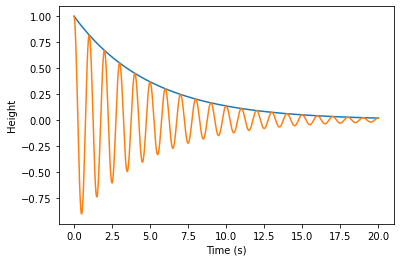

In [ ]:
time_axis_san_2 = np.linspace(0, 20., 1000)
oscillation_san_2 = np.cos(2. * np.pi * time_axis_san_2)
exponential_san_2= np.exp(-time_axis_san_2 / 5.)
plt.plot(time_axis_san_2, exponential_san_2)
plt.xlabel('Time (s)')
plt.plot(time_axis_san_2, exponential_san_2 * oscillation_san_2)
plt.ylabel('Height')

(-0.5, 7.0)

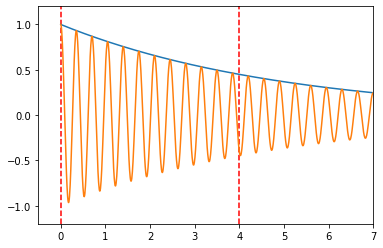

In [ ]:
time_axis_san_2 = np.linspace(0, 7., 1000)
oscillation_san_2 = np.cos(2. * np.pi * time_axis_oil_1)
exponential_san_2 = np.exp(-time_axis_san_2 / 5.)
plt.plot(time_axis_san_2, exponential_san_2)
plt.plot(time_axis_san_2, exponential_san_2* oscillation_san_2)
plt.vlines(0., -1.2, 1.2, color = 'red', linestyle = 'dashed')
plt.vlines(4., -1.2, 1.2, color = 'red', linestyle = 'dashed')
plt.ylim([-1.2, 1.2])
plt.xlim([-0.5, 7])

Best offset: 0.03875784985822428


Text(0, 0.5, 'Position (m)')

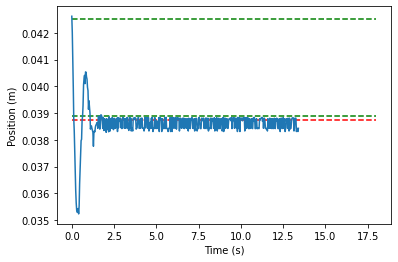

In [ ]:
best_parameters_san_2 = res_lsq_san_2['x']
plt.plot(time_data_array_clip2_san_2, position_data_array_clip2_san_2)

# To see the offset
plt.hlines(best_parameters_san_2[2],-0, 18, color = 'red', linestyle = 'dashed')
print('Best offset: ' + str(best_parameters_san_2[2]))

# To see the peak of the first cycle and the 11th cycle
plt.hlines([0.0425, 0.0389], 0, 18, color = 'green', linestyle = 'dashed')

plt.xlabel('Time (s)')
plt.ylabel('Position (m)')

In [ ]:
def find_tau(t, y_t, y_0):
  nom = t
  denom = np.log(y_0 / y_t)
  tau = nom / denom
  print('Tau is ' + str(tau))

In [ ]:
find_tau(12, .00015, 0.00375)

Tau is 3.728009607357671


In [ ]:
guess_parameters_san_2 = np.append(best_parameters_san_2, 1.72)
print(guess_parameters_san_2)

[2.11206723e-03 6.88051957e+00 3.87578499e-02 5.61822146e-01
 1.72000000e+00]


Text(0, 0.5, 'Position (m)')

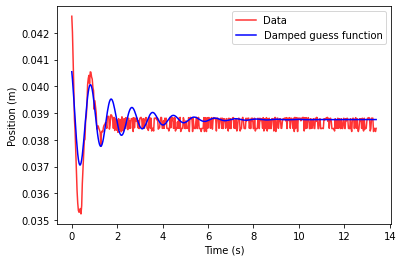

In [ ]:
theoretical_guess_function_san_2 = cos_fit_fun_damped(guess_parameters_san_2, time_data_array_clip2_san_2)
plt.plot(time_data_array_clip2_san_2, position_data_array_clip2_san_2, color = 'red', alpha = 0.8, label = 'Data')
plt.plot(time_data_array_clip2_san_2, theoretical_guess_function_san_2, color = 'blue', label = 'Damped guess function')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')

In [ ]:
def get_residuals(parameters, position_data, time_data):
  theoretical_function = cos_fit_fun_damped(parameters, time_data)
  residuals = np.abs(theoretical_function - position_data)
  return residuals

Best Amplitude: 0.006019701313393943
Best Omega: 6.517391177780785
Best offset: 0.03863176797920626
Best Phi: 0.7411051340998526
Best Tau: 0.6032431878186992


Text(0, 0.5, 'Position (m)')

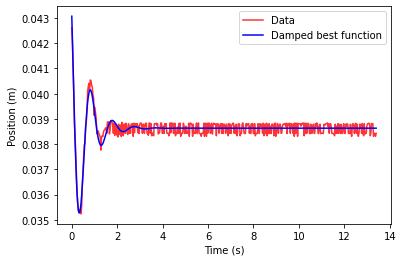

In [ ]:
res_lsq_san_2 = least_squares(get_residuals, guess_parameters_san_2, args=(position_data_array_clip2_san_2,time_data_array_clip2_san_2))
best_parameters_san_2 = res_lsq_san_2['x']
fitted_function_san_2 = cos_fit_fun_damped(best_parameters_san_2, time_data_array_clip2_san_2)
plt.plot(time_data_array_clip2_san_2, position_data_array_clip2_san_2, color='red',alpha = 0.8, label='Data')
plt.plot(time_data_array_clip2_san_2, fitted_function_san_2, color = 'blue', label = 'Damped best function' )
print('Best Amplitude: ' + str(best_parameters_san_2[0]))
print('Best Omega: ' + str(best_parameters_san_2[1]))
print('Best offset: ' + str(best_parameters_san_2[2]))
print('Best Phi: ' + str(best_parameters_san_2[3]))
print('Best Tau: ' + str(best_parameters_san_2[4]))
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')

# Gel (Hand Sanitizer): Experiment 3




In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import least_squares
drive.mount("drive", force_remount=True)

Mounted at drive


In [ ]:
read_in_array_san_3 = np.loadtxt('/content/drive/MyDrive/4AL/Final project files/Copy of san3.txt', delimiter = ';', skiprows = 1)

In [ ]:
# Get the zeroeth column
time_data_array_san_3 = read_in_array_san_3[:, 0]

# convert from ms to s
time_data_array_san_3 = time_data_array_san_3/1000

In [ ]:
# Get the second column for position data
position_data_array_san_3 = read_in_array_san_3[:, 1]

# convert from mm to m
position_data_array_san_3=position_data_array_san_3/1000

Text(0, 0.5, 'Distance (m)')

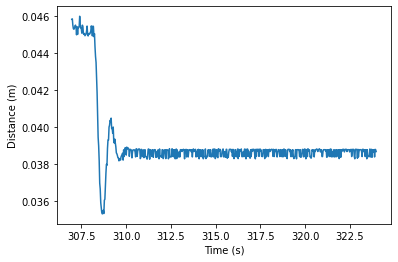

In [ ]:
plt.plot(time_data_array_san_3, position_data_array_san_3)
plt.xlabel('Time (s)')
plt.ylabel('Distance (m)')

Text(0.5, 0, 'Index')

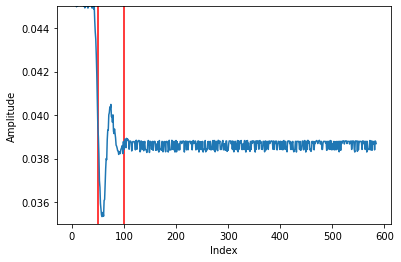

In [ ]:
plt.plot(position_data_array_san_3)
plt.vlines(50, 0.035, 0.045, color = 'red')
plt.vlines(100, 0.035, 0.045, color = 'red')
plt.ylim([0.035, 0.045])
plt.ylabel('Amplitude')
plt.xlabel('Index')


In [ ]:
position_data_array_clip1_san_3 = position_data_array_san_3[50:100]
time_data_array_clip1_san_3 = time_data_array_san_3[50:100]
time_data_array_clip1_san_3 = time_data_array_clip1_san_3 - time_data_array_clip1_san_3[0]

Text(0, 0.5, 'Amplitude')

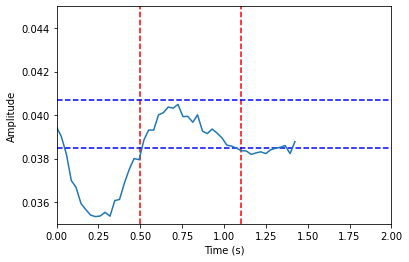

In [ ]:
plt.plot(time_data_array_clip1_san_3, position_data_array_clip1_san_3)
plt.vlines(0.5, .035, 0.045, color = 'red', linestyle = 'dashed')
plt.vlines(1.10, 0.035, 0.045, color = 'red', linestyle = 'dashed')

plt.hlines(0.0407, 0, 2.6,  color = 'blue', linestyle = 'dashed')
plt.hlines(0.0385, 0, 2.6,  color = 'blue', linestyle = 'dashed')

plt.xlim([0, 2.0])
plt.ylim([0.035, 0.045])

plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

In [ ]:
# Use the above graph to guess parameters

guess_amplitude_san_3 = 0.0022
guess_omega_san_3 = 2 * np.pi / (1)
guess_offset_san_3= 0.0385 #distance to centerline
guess_phi_san_3 = 1.5
guess_parameters_san_3 = [guess_amplitude_san_3, guess_omega_san_3, guess_offset_san_3, guess_phi_san_3]

In [ ]:
def cos_fit_fun_1(parameters, time):
  a = parameters[0]
  omega = parameters[1]
  offset = parameters[2]
  phi = parameters[3]
  y = a * np.cos(omega * time + phi) + offset
  return y

In [ ]:
def get_residuals(parameters, position_data, time_data):
  theoretical_function = cos_fit_fun_1(parameters, time_data)
  residuals = np.abs(theoretical_function - position_data)
  return residuals

Text(0, 0.5, 'Position (m)')

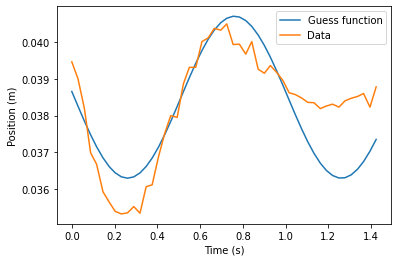

In [ ]:
theoretical_guess_function_san_3 = cos_fit_fun_1(guess_parameters_san_3, time_data_array_clip1_san_3)
plt.plot(time_data_array_clip1_san_3, theoretical_guess_function_san_3, label='Guess function')
plt.plot(time_data_array_clip1_san_3, position_data_array_clip1_san_3, label = 'Data')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')

These functions will be used for fitting.

In [ ]:
def cos_fit_fun_1(parameters, time):
  a = parameters[0]
  omega = parameters[1]
  offset = parameters[2]
  phi = parameters[3]
  y = a * np.cos(omega * time + phi) + offset
  return y

In [ ]:
def get_residuals(parameters, position_data, time_data):
  theoretical_function = cos_fit_fun_1(parameters, time_data)
  residuals = np.abs(theoretical_function - position_data)
  return residuals

In [ ]:
res_lsq_san_3 = least_squares(get_residuals, guess_parameters_san_3, args=(position_data_array_clip1_san_3,time_data_array_clip1_san_3))

Best Amplitude: 0.0017638041179034746
Best Omega: 6.6883691132845335
Best offset: 0.03859913153118721
Best Phi: 1.3709012989930784


Text(0, 0.5, 'Position (m)')

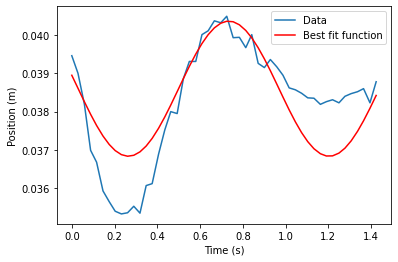

In [ ]:
best_parameters_san_3 = res_lsq_san_3['x']
fitted_function_san_3 = cos_fit_fun_1(best_parameters_san_3, time_data_array_clip1_san_3)
plt.plot(time_data_array_clip1_san_3, position_data_array_clip1_san_3, label = 'Data')
plt.plot(time_data_array_clip1_san_3, fitted_function_san_3, color = 'red', label='Best fit function')
print('Best Amplitude: ' + str(best_parameters_san_3[0]))
print('Best Omega: ' + str(best_parameters_san_3[1]))
print('Best offset: ' + str(best_parameters_san_3[2]))
print('Best Phi: ' + str(best_parameters_san_3[3]))
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')

Now applying this to the entire curve

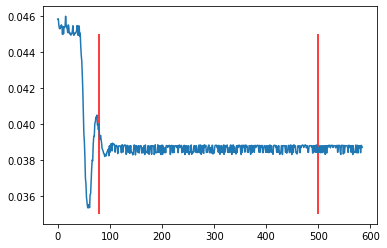

In [ ]:

plt.plot(position_data_array_san_3)
plt.vlines(80, 0.035, 0.045, color = 'red')
plt.vlines(500, 0.035, 0.045, color = 'red')

In [ ]:
position_data_array_clip2_san_3 = position_data_array_san_3[50:]
time_data_array_clip2_san_3 = time_data_array_san_3[50:]
time_data_array_clip2_san_3 = time_data_array_clip2_san_3 - time_data_array_clip2_san_3[0]

See how initial best fit cimpares to full range of data.

Text(0, 0.5, 'Position (m)')

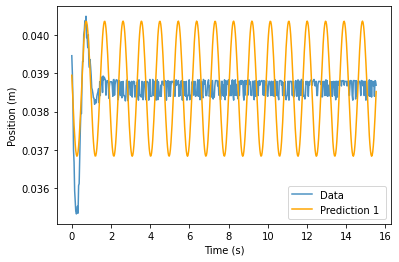

In [ ]:
guess_parameters_san_3 = best_parameters_san_3
theoretical_guess_function_san_3 = cos_fit_fun_1(guess_parameters_san_3, time_data_array_clip2_san_3)
plt.plot(time_data_array_clip2_san_3, position_data_array_clip2_san_3, alpha = 0.8, label = 'Data')
plt.plot(time_data_array_clip2_san_3, theoretical_guess_function_san_3, color='orange', label = 'Prediction 1 ')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')

Next, fitted function with damping

Best Amplitude: 0.0017638041179034746
Best Omega: 6.6883691132845335
Best offset: 0.03859913153118721
Best Phi: 1.3709012989930784


Text(0, 0.5, 'Position (m)')

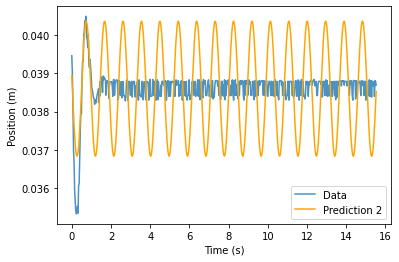

In [ ]:
best_parameters_san_3 = res_lsq_san_3['x']
fitted_function_san_3 = cos_fit_fun_1(best_parameters_san_3, time_data_array_clip2_san_3)
plt.plot(time_data_array_clip2_san_3, position_data_array_clip2_san_3, alpha = 0.8, label='Data')
plt.plot(time_data_array_clip2_san_3, fitted_function_san_3, color = 'orange', label='Prediction 2')
print('Best Amplitude: ' + str(best_parameters_san_3[0]))
print('Best Omega: ' + str(best_parameters_san_3[1]))
print('Best offset: ' + str(best_parameters_san_3[2]))
print('Best Phi: ' + str(best_parameters_san_3[3]))
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')

Functions for residuals and damping.

In [ ]:
def cos_fit_fun_damped(parameters, time):
  a = parameters[0]
  omega = parameters[1]
  offset = parameters[2]
  phi = parameters[3]
  tau = parameters[4]
  y = a * np.cos(omega * time + phi) * np.exp(-time / tau) + offset
  return y

In [ ]:
def get_residuals(parameters, position_data, time_data):
  theoretical_function = cos_fit_fun_damped(parameters, time_data)
  residuals = np.abs(theoretical_function - position_data)
  return residuals

Text(0, 0.5, 'Height')

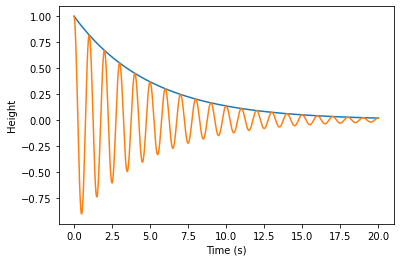

In [ ]:
time_axis_san_3 = np.linspace(0, 20., 1000)
oscillation_san_3 = np.cos(2. * np.pi * time_axis_san_3)
exponential_san_3= np.exp(-time_axis_san_3 / 5.)
plt.plot(time_axis_san_3, exponential_san_3)
plt.xlabel('Time (s)')
plt.plot(time_axis_san_3, exponential_san_3 * oscillation_san_3)
plt.ylabel('Height')

(-0.5, 7.0)

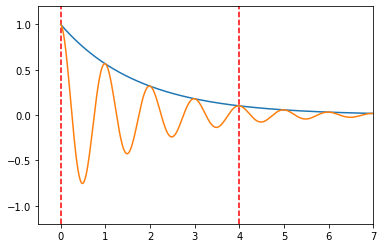

In [ ]:
time_axis_san_3 = np.linspace(0, 7., 1000)
oscillation_san_3 = np.cos(2. * np.pi * time_axis_san_3)
exponential_san_2 = np.exp(-time_axis_san_3 / 5.)
plt.plot(time_axis_san_3, exponential_san_3)
plt.plot(time_axis_san_3, exponential_san_3* oscillation_san_3)
plt.vlines(0., -1.2, 1.2, color = 'red', linestyle = 'dashed')
plt.vlines(4., -1.2, 1.2, color = 'red', linestyle = 'dashed')
plt.ylim([-1.2, 1.2])
plt.xlim([-0.5, 7])

Best offset: 0.03859913153118721


Text(0, 0.5, 'Position (m)')

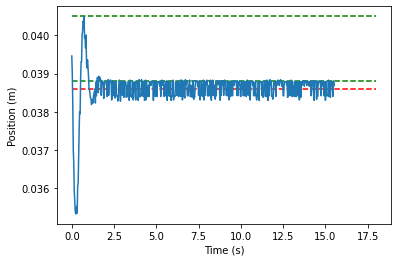

In [ ]:
best_parameters_san_3 = res_lsq_san_3['x']
plt.plot(time_data_array_clip2_san_3, position_data_array_clip2_san_3)

# To see the offset
plt.hlines(best_parameters_san_3[2],-0, 18, color = 'red', linestyle = 'dashed')
print('Best offset: ' + str(best_parameters_san_3[2]))

# To see the peak of the first cycle and the 11th cycle
plt.hlines([0.0405, 0.0388], 0, 18, color = 'green', linestyle = 'dashed')

plt.xlabel('Time (s)')
plt.ylabel('Position (m)')

In [ ]:
def find_tau(t, y_t, y_0):
  nom = t
  denom = np.log(y_0 / y_t)
  tau = nom / denom
  print('Tau is ' + str(tau))

In [ ]:
find_tau(12, 0.0003, 0.002)

Tau is 6.325377464579208


In [ ]:
guess_parameters_san_3 = np.append(best_parameters_san_3, 6.32)
print(guess_parameters_san_3)

[1.76380412e-03 6.68836911e+00 3.85991315e-02 1.37090130e+00
 6.32000000e+00]


Text(0, 0.5, 'Position (m)')

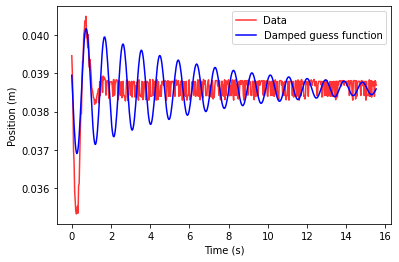

In [ ]:
theoretical_guess_function_san_3 = cos_fit_fun_damped(guess_parameters_san_3, time_data_array_clip2_san_3)
plt.plot(time_data_array_clip2_san_3, position_data_array_clip2_san_3, color = 'red', alpha = 0.8, label = 'Data')
plt.plot(time_data_array_clip2_san_3, theoretical_guess_function_san_3, color = 'blue', label = 'Damped guess function')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')

In [ ]:
def get_residuals(parameters, position_data, time_data):
  theoretical_function = cos_fit_fun_damped(parameters, time_data)
  residuals = np.abs(theoretical_function - position_data)
  return residuals

Best Amplitude: 0.005521636898610888
Best Omega: 6.498147034863334
Best offset: 0.03864866403958315
Best Phi: 1.3377889731407504
Best Tau: 0.5348293043222078


Text(0, 0.5, 'Position (m)')

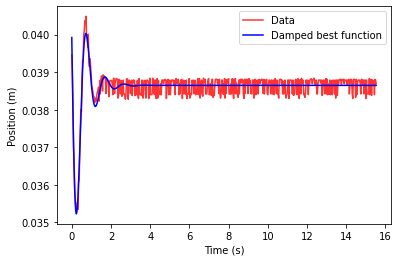

In [ ]:
res_lsq_san_3 = least_squares(get_residuals, guess_parameters_san_3, args=(position_data_array_clip2_san_3,time_data_array_clip2_san_3))
best_parameters_san_3 = res_lsq_san_3['x']
fitted_function_san_3 = cos_fit_fun_damped(best_parameters_san_3, time_data_array_clip2_san_3)
plt.plot(time_data_array_clip2_san_3, position_data_array_clip2_san_3, color='red',alpha = 0.8, label='Data')
plt.plot(time_data_array_clip2_san_3, fitted_function_san_3, color = 'blue', label = 'Damped best function' )
print('Best Amplitude: ' + str(best_parameters_san_3[0]))
print('Best Omega: ' + str(best_parameters_san_3[1]))
print('Best offset: ' + str(best_parameters_san_3[2]))
print('Best Phi: ' + str(best_parameters_san_3[3]))
print('Best Tau: ' + str(best_parameters_san_3[4]))
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')